# 데이터 탐색 과정
---

## 데이터 분석을 위한 Library 데이터 준비 과정

### 분석을 위한 Library 로딩

In [223]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl  
import missingno as msno
import warnings

warnings.filterwarnings('ignore')
sns.set_theme(style="whitegrid")
%matplotlib inline

mpl.rc('font', family='Malgun Gothic')  # 한글 폰트 설정
                                        # 윈도우 폰트 위치 - C:\Windows\Fonts
plt.figure(figsize=(10,6))              # 그래프 사이즈 설정
#plt.legend(loc='right')                 # 범주의 위치 조정                



<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [ ]:
# 금액에 대한 범주화
# -----------------
def calcAmountCategory(amount):
    amount = (amount // 1000) * 1000
    return amount

### 데이터 세트 로딩
"data/bank_churner.csv"를 판다스 데이터프레임으로 로딩(pd.read_csv)

In [172]:
bank_churner_df = pd.read_csv("./data/bank_churner.csv")
bank_churner_df.head(5)

,cstno,is_churned,age,sex,dependent_num,education,marital_stat,imcome_cat,card_type,mon_on_book,...,months_inact_for_12m,contact_cnt_for_12m,credit_line,tot_revol_balance,mean_open_to_buy,tot_amt_ratio_q4_q1,tot_trans_amt_for_12m,tot_trans_cnt_for_12m,tot_cnt_ratio_q4_q1,mean_util_pct
0,708082083,0,45,F,3,High School,Married,Less than $40K,Blue,36,...,3,3,3544.0,NaN,1883.0,0.831,NaN,111.0,0.734,0.469
1,708083283,1,58,M,0,Unknown,Single,$40K - $60K,Blue,45,...,1,3,3421.0,2517.0,904.0,0.992,992.0,21.0,0.400,NaN
2,708084558,1,46,M,3,Doctorate,Divorced,$80K - $120K,Blue,38,...,3,3,8258.0,1771.0,6487.0,NaN,1447.0,23.0,0.000,0.214
3,708085458,0,34,F,2,Uneducated,Single,Less than $40K,Blue,24,...,2,2,1438.3,0.0,1438.3,0.827,3940.0,82.0,0.952,0.000
4,708086958,0,49,F,2,Uneducated,Married,Unknown,Blue,41,...,5,2,3128.0,749.0,2379.0,0.598,NaN,NaN,NaN,0.239


### 데이터 세트 정보 확인
- 일부 Feature에 Null 값 존재함을 확인 함
- 향후 모델학습시 Null 값 처리에 대한 필요성 확인 함
- 모델학습을 의해 Oject 항목을 적절하게 변형할 필요성을 확인 함 - sex, education, marital_stat, imcome_cat, card_type (5개 Features) 

In [173]:
bank_churner_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8101 entries, 0 to 8100
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   cstno                  8101 non-null   int64  
 1   is_churned             8101 non-null   int64  
 2   age                    8101 non-null   int64  
 3   sex                    7293 non-null   object 
 4   dependent_num          8101 non-null   int64  
 5   education              8101 non-null   object 
 6   marital_stat           8101 non-null   object 
 7   imcome_cat             6482 non-null   object 
 8   card_type              8101 non-null   object 
 9   mon_on_book            8101 non-null   int64  
 10  tot_product_count      8101 non-null   int64  
 11  months_inact_for_12m   8101 non-null   int64  
 12  contact_cnt_for_12m    8101 non-null   int64  
 13  credit_line            8101 non-null   float64
 14  tot_revol_balance      6580 non-null   float64
 15  mean

### 수치 데이터의 분포값 개략 확인

In [174]:
bank_churner_df.describe()

,cstno,is_churned,age,dependent_num,mon_on_book,tot_product_count,months_inact_for_12m,contact_cnt_for_12m,credit_line,tot_revol_balance,mean_open_to_buy,tot_amt_ratio_q4_q1,tot_trans_amt_for_12m,tot_trans_cnt_for_12m,tot_cnt_ratio_q4_q1,mean_util_pct
count,8.101000e+03,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,8101.000000,6580.000000,8101.000000,5666.000000,6432.000000,4851.000000,6472.000000,5575.000000
mean,7.391329e+08,0.160474,46.306382,2.334773,35.923590,3.813233,2.346871,2.450315,8636.548068,1158.693313,7476.165276,0.761457,4438.785448,64.568336,0.709951,0.274055
std,3.691912e+07,0.367068,8.022527,1.289564,8.024359,1.551838,1.014177,1.100687,9086.419557,814.653118,9080.279910,0.217645,3451.913558,23.659213,0.234484,0.275833
min,7.080821e+08,0.000000,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,11.000000,0.000000,0.000000
25%,7.130534e+08,0.000000,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,324.750000,1341.000000,0.631000,2152.750000,44.500000,0.581000,0.023000
50%,7.178860e+08,0.000000,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1272.000000,3495.000000,0.739000,3905.000000,67.000000,0.700000,0.175000
75%,7.728464e+08,0.000000,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11128.000000,1777.250000,9942.000000,0.862000,4754.250000,80.000000,0.818000,0.501000
max,8.283431e+08,1.000000,70.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,2.594000,18484.000000,139.000000,3.571000,0.999000


### 결측치 확인 및 시각화

In [175]:
bank_churner_df.isnull().sum() 

cstno                       0
is_churned                  0
age                         0
sex                       808
dependent_num               0
education                   0
marital_stat                0
imcome_cat               1619
card_type                   0
mon_on_book                 0
tot_product_count           0
months_inact_for_12m        0
contact_cnt_for_12m         0
credit_line                 0
tot_revol_balance        1521
mean_open_to_buy            0
tot_amt_ratio_q4_q1      2435
tot_trans_amt_for_12m    1669
tot_trans_cnt_for_12m    3250
tot_cnt_ratio_q4_q1      1629
mean_util_pct            2526
dtype: int64

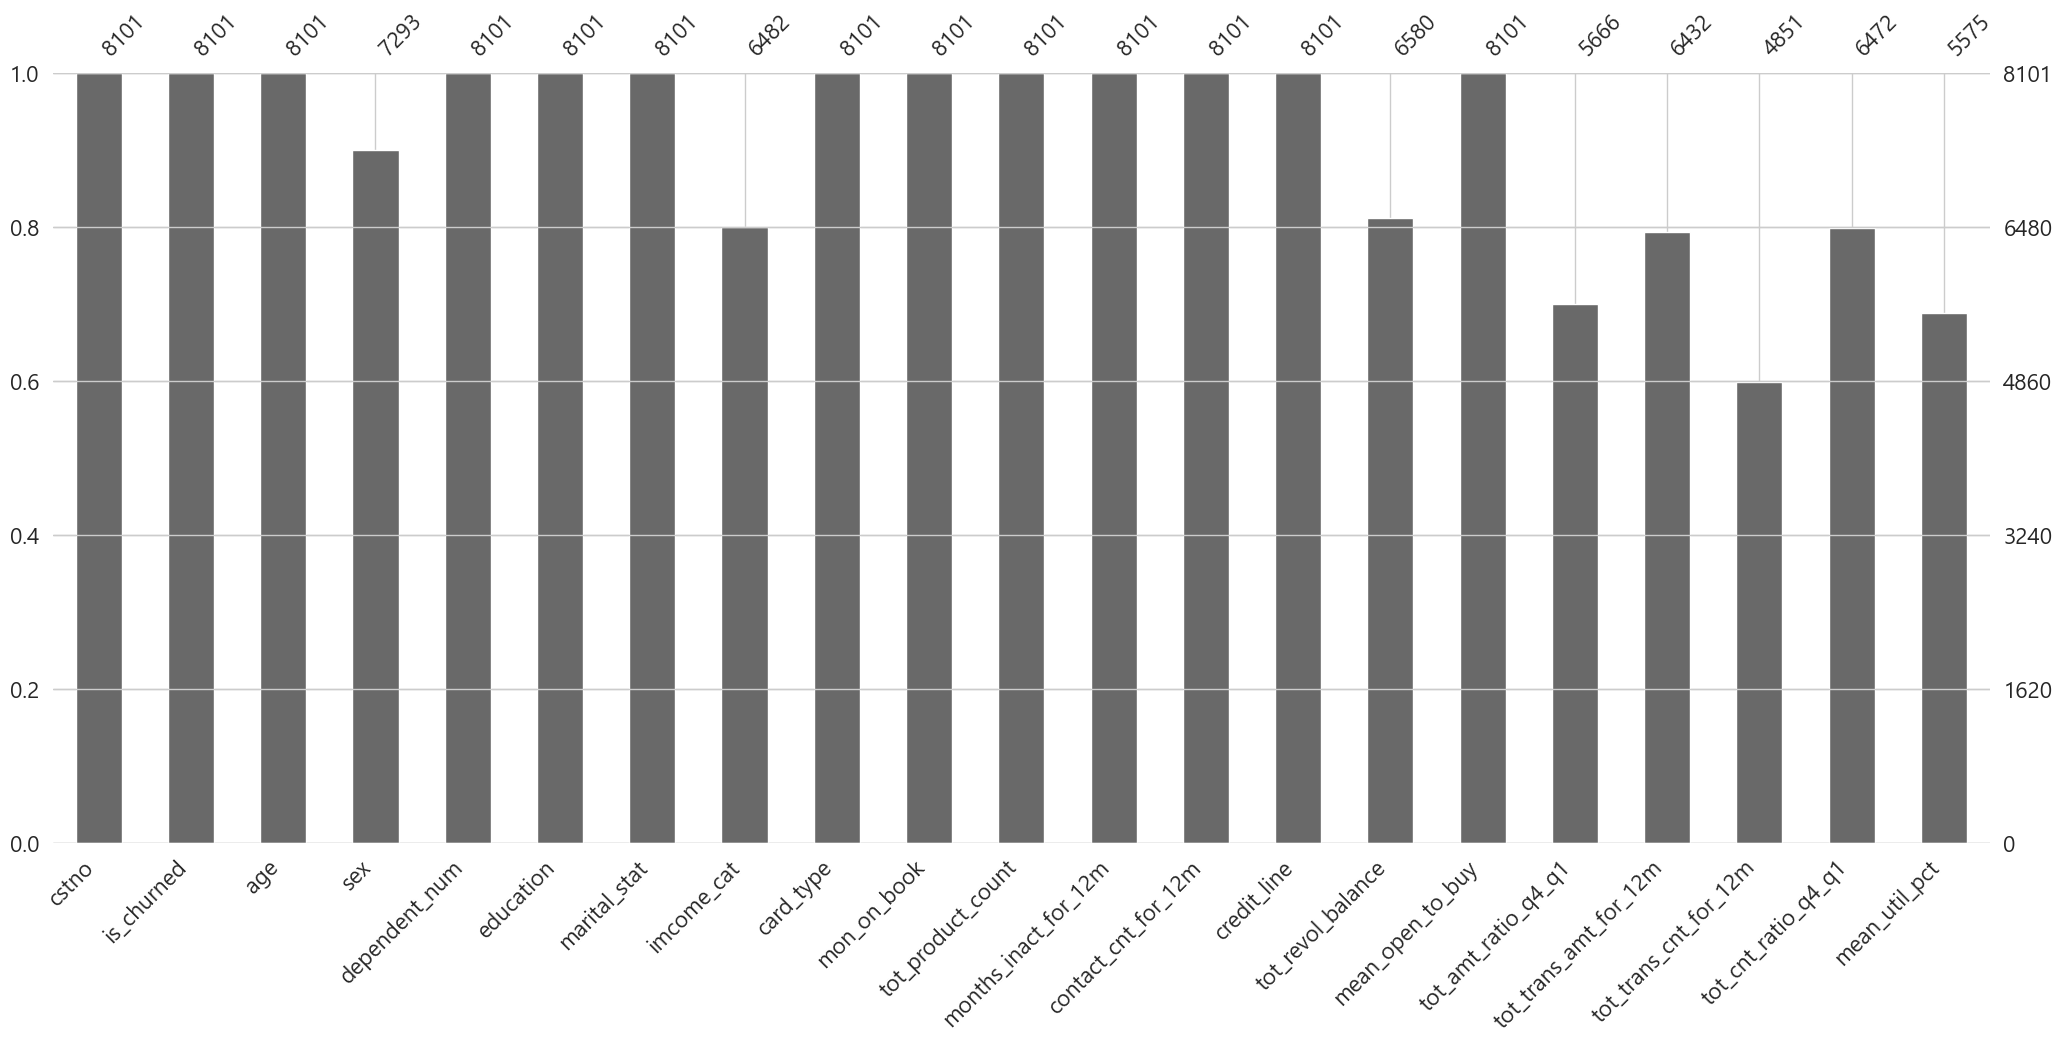

In [176]:
plt.figure(figsize=(24, 12))
msno.bar(bank_churner_df)
plt.show()

## Feature별 특징 확인

### is_churned : 이탈  여부
- 1 : 이탈, 0 : 유지

In [177]:
bank_churner_df["is_churned"].value_counts()

0    6801
1    1300
Name: is_churned, dtype: int64

In [403]:
tot_cnt = bank_churner_df['is_churned'].count().sum()
tot_null_cnt = bank_churner_df['is_churned'].isnull().sum()
print(f'전체 데이터 건수 = {tot_cnt:,} Null 건수 = {tot_null_cnt:,} 전체 데이터 중 널 비율 =  {round(tot_null_cnt / tot_cnt,2)}') 

전체 데이터 건수 = 8,101 Null 건수 = 0 전체 데이터 중 널 비율 =  0.0


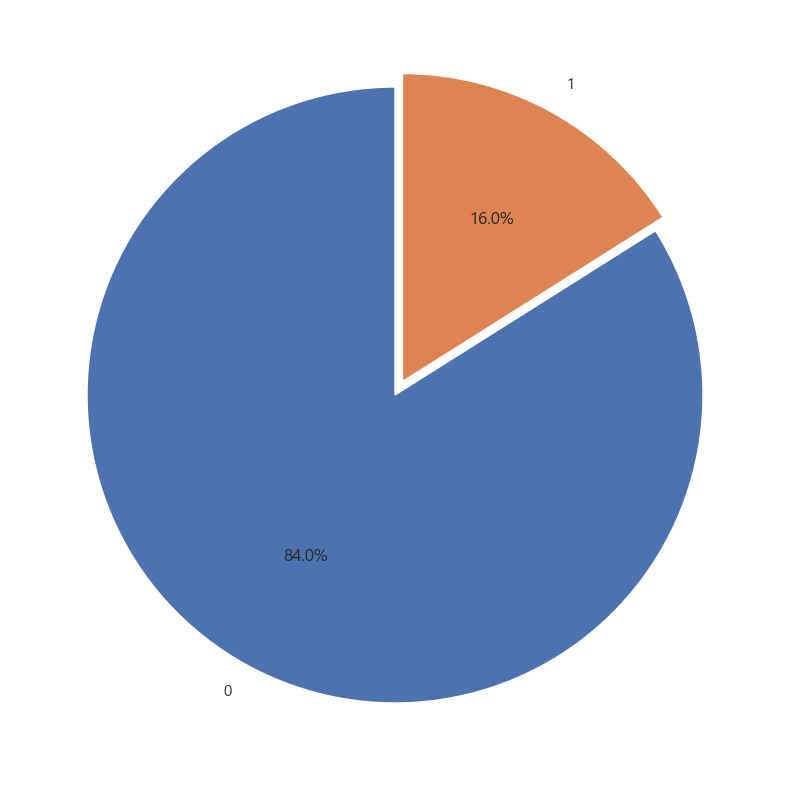

In [407]:
plt.figure(figsize = (10, 10))
plt.pie(bank_churner_df.is_churned.value_counts(),
        labels = bank_churner_df.is_churned.value_counts().index,
        autopct = '%.1f%%',
        explode = [0.0, 0.05],
        startangle = 90)
plt.show()

<Axes: xlabel='is_churned', ylabel='count'>

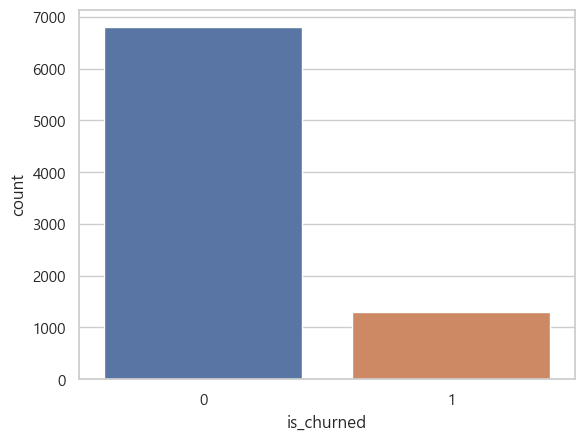

In [178]:
sns.countplot(x='is_churned', data=bank_churner_df)

### age : 나이

In [179]:
bank_churner_df["age"].describe()

count    8101.000000
mean       46.306382
std         8.022527
min        26.000000
25%        41.000000
50%        46.000000
75%        52.000000
max        70.000000
Name: age, dtype: float64

<Axes: xlabel='age', ylabel='count'>

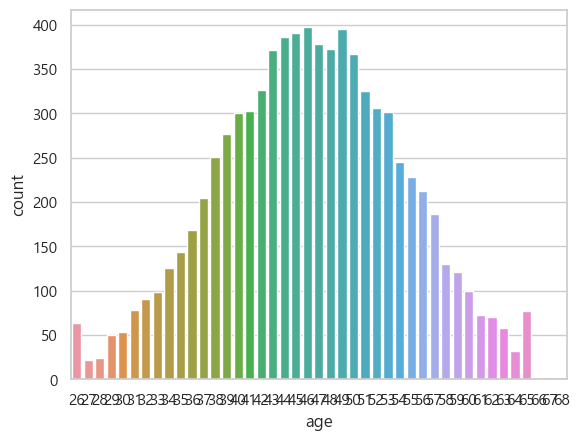

In [180]:
age_df = bank_churner_df[(bank_churner_df['age'] > 20) & (bank_churner_df['age'] < 70)][['age']]
age_df
sns.countplot(x='age', data=age_df)

In [181]:
# 나이를 나이대별로 범주화
def age_categorize(age):
    age = (age // 10) * 10
    return age

bank_churner_df['age_category'] = bank_churner_df.age.apply(age_categorize)
bank_churner_df['age_category']
    

0       40
1       50
2       40
3       30
4       40
        ..
8096    40
8097    50
8098    40
8099    50
8100    40
Name: age_category, Length: 8101, dtype: int64

<Axes: xlabel='age_category', ylabel='count'>

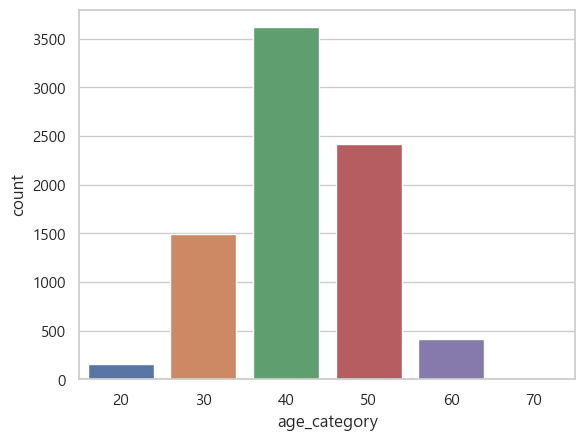

In [182]:
sns.countplot(x='age_category', data=bank_churner_df)

<Axes: xlabel='age_category', ylabel='count'>

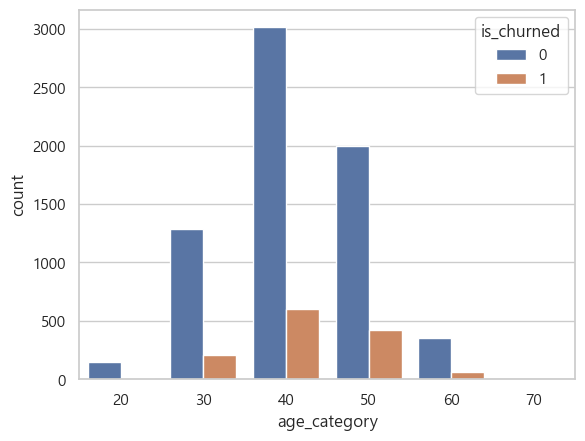

In [183]:
sns.countplot(x='age_category', data=bank_churner_df, hue='is_churned')

### sex : 성별

In [184]:
bank_churner_df['sex'].value_counts()

F    3840
M    3453
Name: sex, dtype: int64

<Axes: xlabel='sex', ylabel='count'>

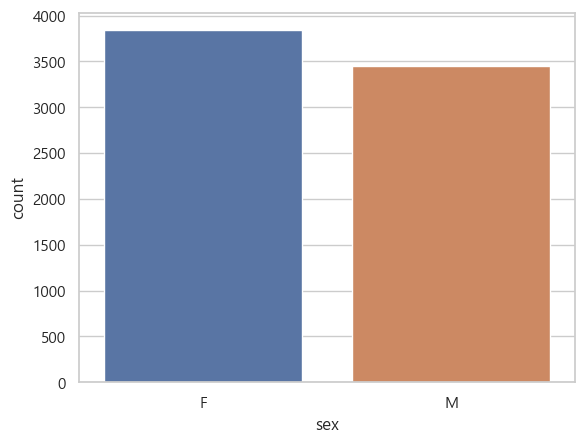

In [185]:
sns.countplot(x='sex', data=bank_churner_df)

<Axes: xlabel='sex', ylabel='count'>

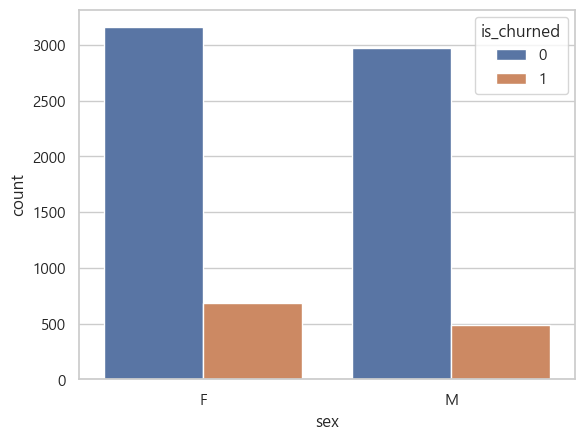

In [186]:
sns.countplot(x='sex', data=bank_churner_df, hue='is_churned')

### dependent_num : 부양가족수

In [187]:
bank_churner_df['dependent_num'].value_counts()

3    2222
2    2150
1    1465
4    1212
0     725
5     327
Name: dependent_num, dtype: int64

<Axes: xlabel='dependent_num', ylabel='count'>

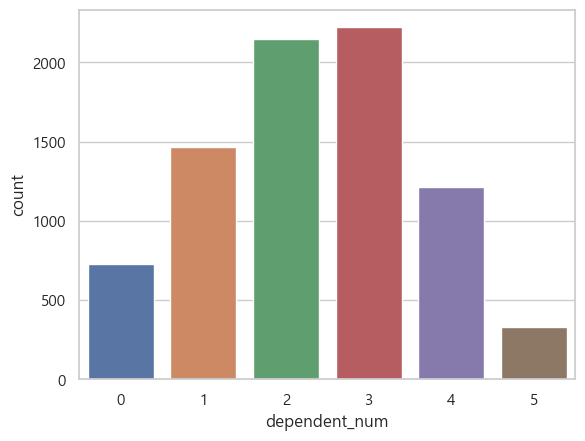

In [188]:
sns.countplot(x='dependent_num', data=bank_churner_df)

<Axes: xlabel='dependent_num', ylabel='count'>

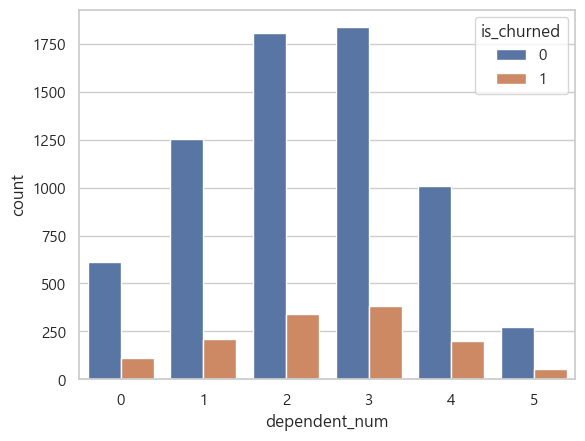

In [189]:
#sns.countplot(x='dependent_num', data=bank_churner_df, hue='is_churned', order = bank_churner_df['dependent_num'].value_counts().index)
sns.countplot(x='dependent_num', data=bank_churner_df, hue='is_churned')

### education : 교육수준
- Graduate : 대학원
- High School : 고졸
- Unknown
- Uneducated : 미교육
- College : 단과대학
- Post-Graduate : 보딩스쿨(재수)
- Doctorate :박사

In [190]:
bank_churner_df['education'].value_counts()

Graduate         2528
High School      1619
Unknown          1205
Uneducated       1171
College           816
Post-Graduate     407
Doctorate         355
Name: education, dtype: int64

<Axes: xlabel='education', ylabel='count'>

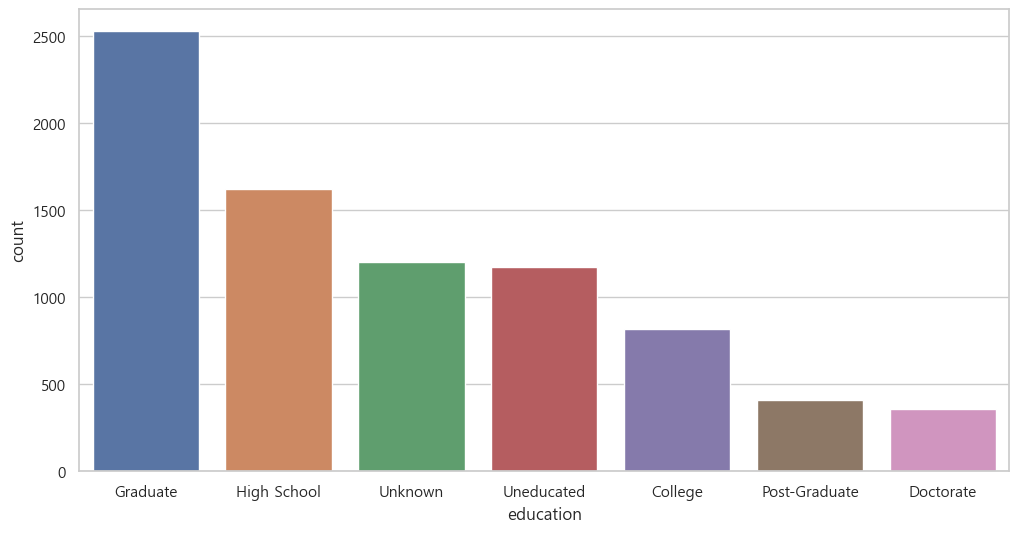

In [191]:
plt.figure(figsize=(12, 6))
sns.countplot(x='education', data=bank_churner_df, order = bank_churner_df['education'].value_counts().index)

<Axes: xlabel='education', ylabel='count'>

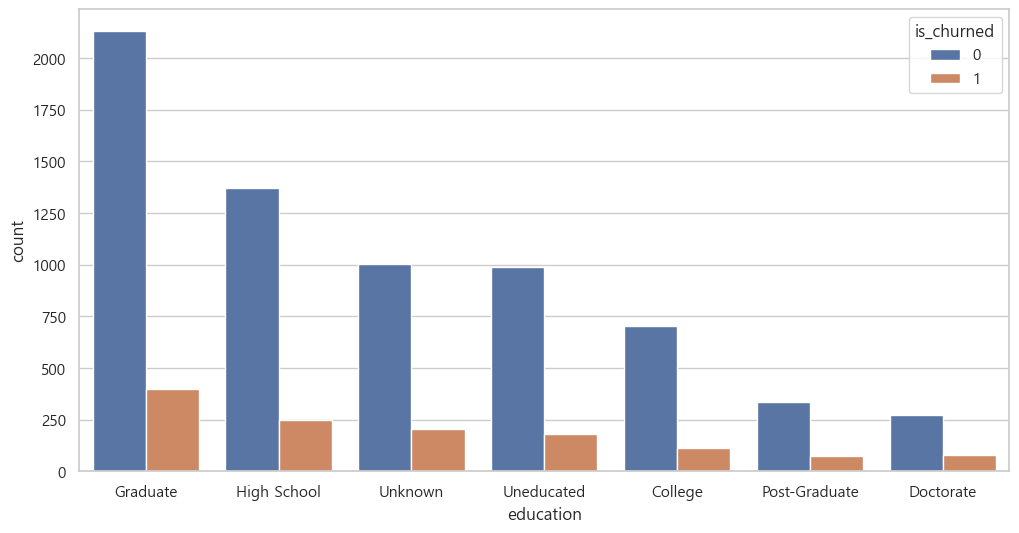

In [192]:
plt.figure(figsize=(12, 6))
#sns.countplot(x='education', data=bank_churner_df, hue='is_churned', order = bank_churner_df['education'].value_counts(ascending=True).index)
sns.countplot(x='education', data=bank_churner_df, hue='is_churned', order = bank_churner_df['education'].value_counts().index)

In [193]:
### marital_stat : 결혼상태
- Married  : 결혼
- Single   : 미혼
- Divorced : 이혼

SyntaxError: illegal target for annotation (512437623.py, line 2)

In [ ]:
bank_churner_df['marital_stat'].value_counts()

Married     3767
Single      3144
Divorced     611
Unknown      579
Name: marital_stat, dtype: int64

<Axes: xlabel='marital_stat', ylabel='count'>

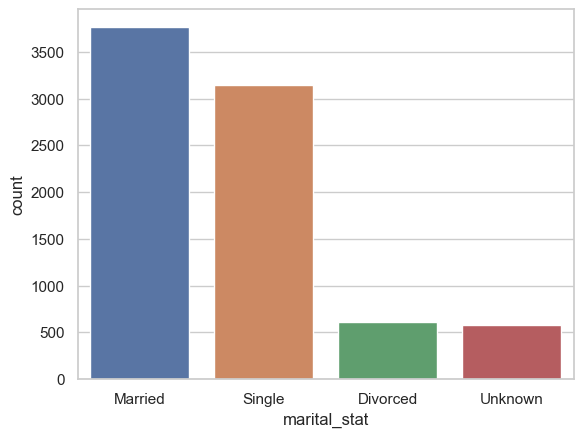

In [ ]:
sns.countplot(x='marital_stat', data=bank_churner_df)

<Axes: xlabel='marital_stat', ylabel='count'>

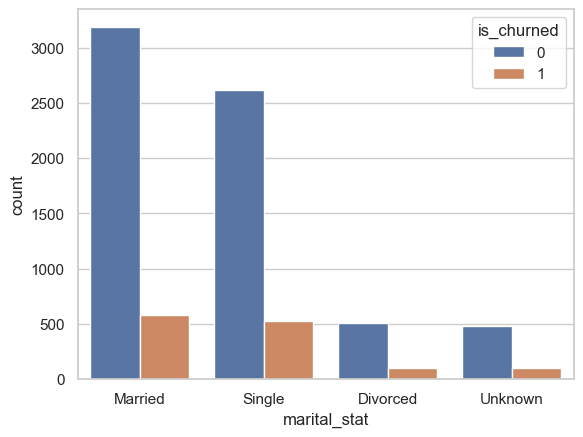

In [ ]:
sns.countplot(x='marital_stat', data=bank_churner_df, hue='is_churned')

### imcome_cat : 수입규모
- Less than $40K    2277
- $40K - $60K       1151
- $60K - $80K        891
- $80K - $120K       988
- $120K +            473
- Unknown            702


In [ ]:
bank_churner_df['imcome_cat'].value_counts()

Less than $40K    2277
$40K - $60K       1151
$80K - $120K       988
$60K - $80K        891
Unknown            702
$120K +            473
Name: imcome_cat, dtype: int64

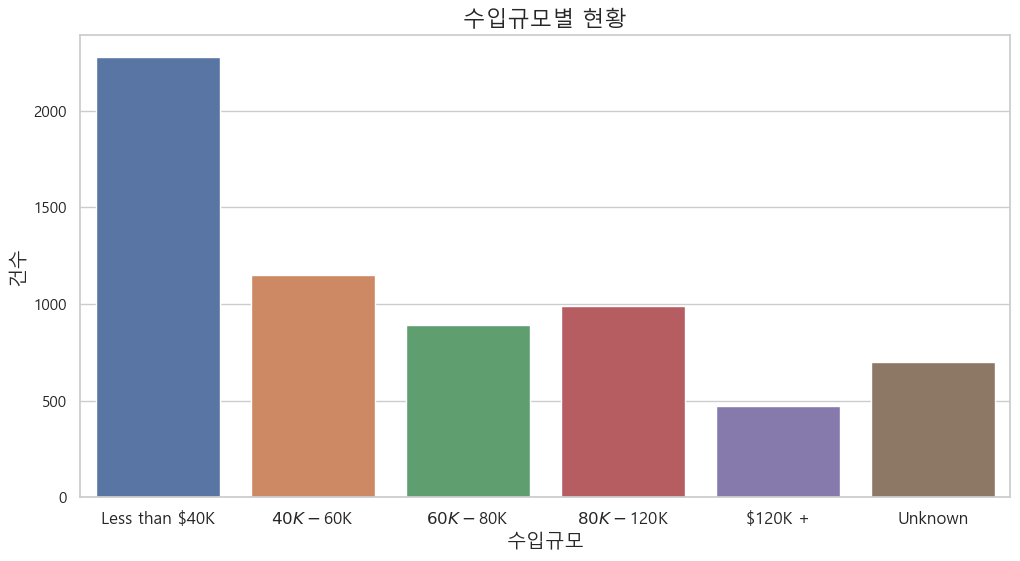

In [402]:
plt.figure(figsize=(12, 6))
sns.countplot(x='imcome_cat', data=bank_churner_df, 
              order=['Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +', 'Unknown'])
plt.title("수입규모별 현황", fontsize=16)
plt.xlabel("수입규모", fontsize=14)
plt.ylabel("건수", fontsize=14)
plt.xticks(fontsize=12)
plt.show()

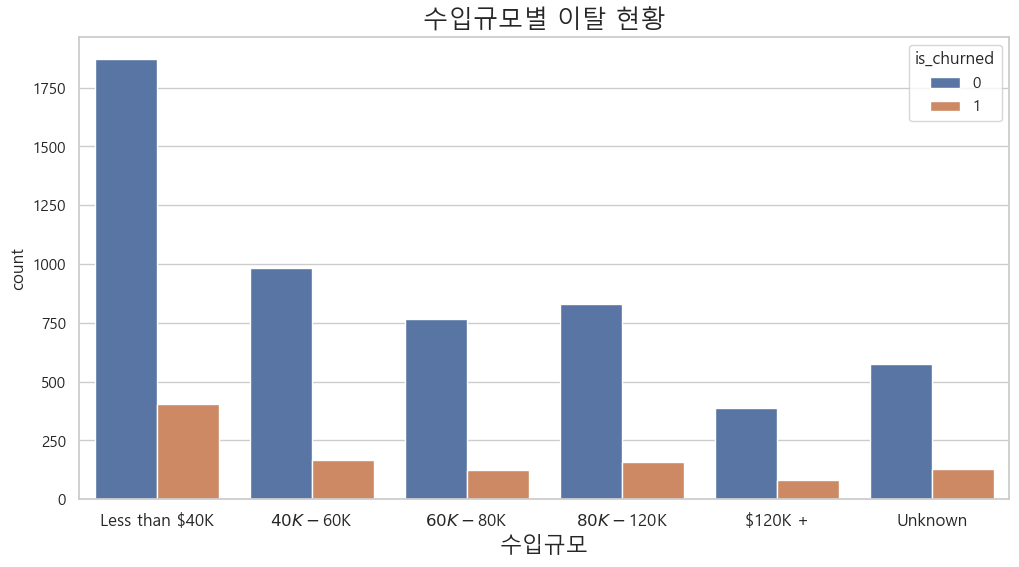

In [398]:
plt.figure(figsize=(12, 6))

sns.countplot(x='imcome_cat', data=bank_churner_df, hue='is_churned'
            , order=['Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +', 'Unknown'])
plt.title("수입규모별 이탈 현황", fontsize=18)
plt.xlabel("수입규모", fontsize=16)
plt.xticks(fontsize=12)
plt.show()

In [ ]:
bank_churner_imcome_cat_df_agg = bank_churner_df.groupby('imcome_cat')[['imcome_cat']].count()

imcome_order = ['Less than $40K','$40K - $60K','$80K - $120K','$60K - $80K','$120K +','Unknown']
bank_churner_imcome_cat_df_agg=bank_churner_imcome_cat_df_agg.loc[imcome_order]
bank_churner_imcome_cat_df_agg

plt.figure(figsize=(12, 8))

lsc
plt.bar(df_agg.index, df_agg.imcome_cat)
plt.title("Count plot after reordering x-axis label", fontsize=20)
plt.xlabel("imcome_cat", fontsize=18)
plt.xticks(fontsize=16)
plt.show()


### card_type : 카드종류
- Blue       
- Silver     
- Gold       
- Platinum   

In [ ]:
bank_churner_df[['card_type','is_churned']].value_counts()

card_type  is_churned
Blue       0             6338
           1             1219
Silver     0              376
Gold       0               77
Silver     1               60
Gold       1               16
Platinum   0               10
           1                5
dtype: int64

In [ ]:
bank_churner_df.groupby(['card_type','is_churned'], as_index=False)['cstno'].count()

,card_type,is_churned,cstno
0,Blue,0,6338
1,Blue,1,1219
2,Gold,0,77
3,Gold,1,16
4,Platinum,0,10
5,Platinum,1,5
6,Silver,0,376
7,Silver,1,60


<Axes: xlabel='card_type', ylabel='count'>

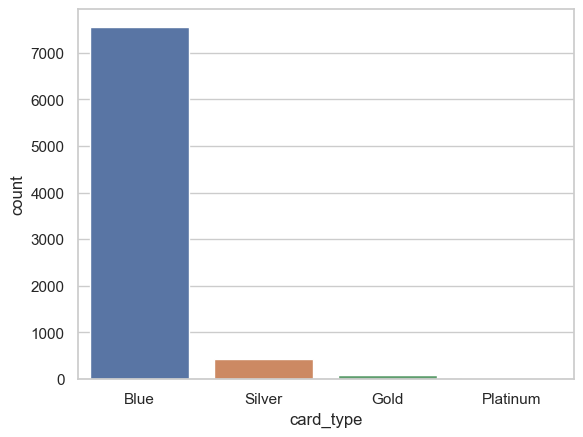

In [ ]:
sns.countplot(x='card_type', data=bank_churner_df)

<Axes: xlabel='card_type', ylabel='count'>

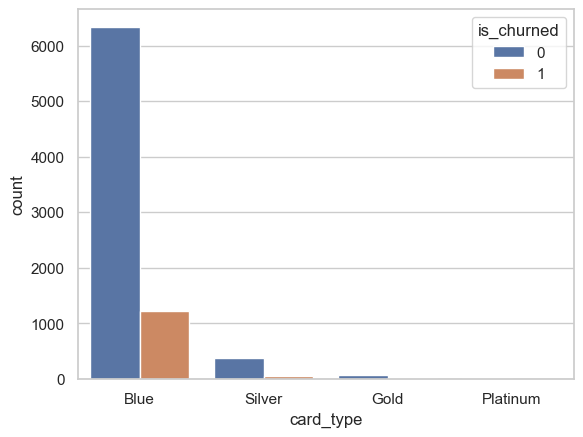

In [ ]:
sns.countplot(x='card_type', data=bank_churner_df, hue='is_churned')

### mon_on_book : 은행 거래 기간 ???
- 은행 거래 개월 수

In [ ]:
bank_churner_df['mon_on_book'].value_counts()
bank_churner_df['mon_on_book'].describe()

count    8101.000000
mean       35.923590
std         8.024359
min        13.000000
25%        31.000000
50%        36.000000
75%        40.000000
max        56.000000
Name: mon_on_book, dtype: float64

In [ ]:
bank_churner_df['mon_on_book'].value_counts()

36    1950
37     276
39     276
38     274
40     269
34     267
35     256
31     255
33     250
41     243
32     241
30     230
28     230
43     212
42     210
29     192
45     187
44     187
27     172
46     155
26     144
47     139
25     133
48     133
24     125
49     114
23      95
50      87
22      83
56      78
21      71
51      64
53      63
20      63
13      57
19      54
52      52
18      46
54      43
55      33
17      31
15      28
16      20
14      13
Name: mon_on_book, dtype: int64

In [ ]:
# 은행 거래 기간 변환
# 30대, 40대, 50대
 
def calcUseMonth(mon_on_book):
    mon_on_book = (mon_on_book // 10) * 10
    return mon_on_book


bank_churner_df['mon_on_book_category'] = bank_churner_df.mon_on_book.apply(calcUseMonth)


<Axes: xlabel='mon_on_book_category', ylabel='count'>

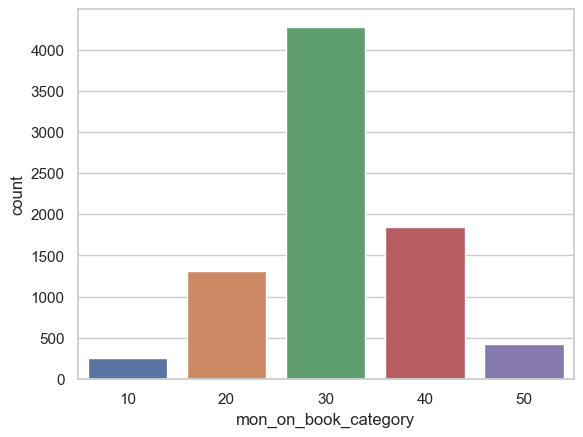

In [ ]:
sns.countplot(x='mon_on_book_category', data=bank_churner_df)

<Axes: xlabel='mon_on_book_category', ylabel='count'>

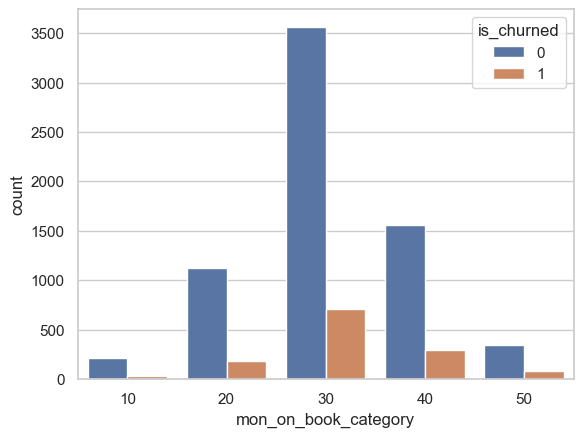

In [ ]:
sns.countplot(x='mon_on_book_category', data=bank_churner_df, hue='is_churned')

### tot_product_count : 현재 보유 상품 개수

In [ ]:
bank_churner_df['tot_product_count'].value_counts()

3    1852
4    1539
5    1511
6    1488
2     985
1     726
Name: tot_product_count, dtype: int64

<Axes: xlabel='tot_product_count', ylabel='count'>

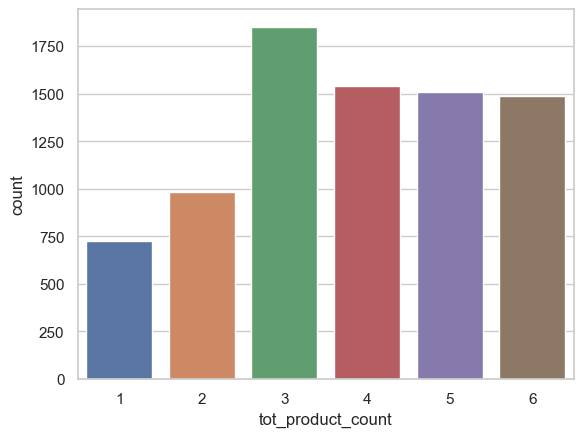

In [ ]:
sns.countplot(x='tot_product_count', data=bank_churner_df)

<Axes: xlabel='tot_product_count', ylabel='count'>

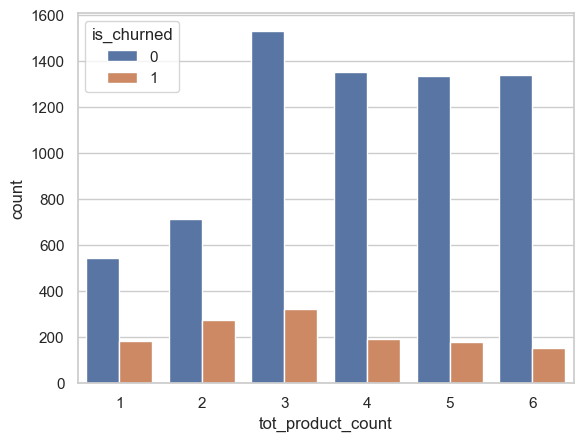

In [ ]:
sns.countplot(x='tot_product_count', data=bank_churner_df, hue='is_churned')

## 보유 카드 갯수에 따라 이탈율이 다르므로 상품 갯수별 이탈률 확인할 필요 있음

### months_inact_for_12m : 최근 12개월 동안 카드 거래가 없었던 개월 수

In [ ]:
bank_churner_df['months_inact_for_12m'].value_counts()

3    3094
2    2611
1    1780
4     346
5     144
6     104
0      22
Name: months_inact_for_12m, dtype: int64

<Axes: xlabel='months_inact_for_12m', ylabel='count'>

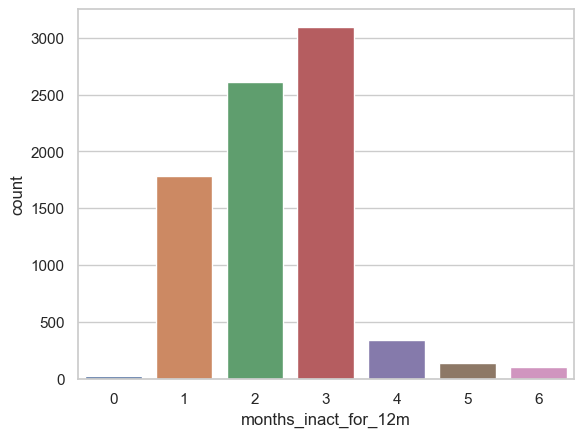

In [ ]:
sns.countplot(x='months_inact_for_12m', data=bank_churner_df)

<Axes: xlabel='months_inact_for_12m', ylabel='count'>

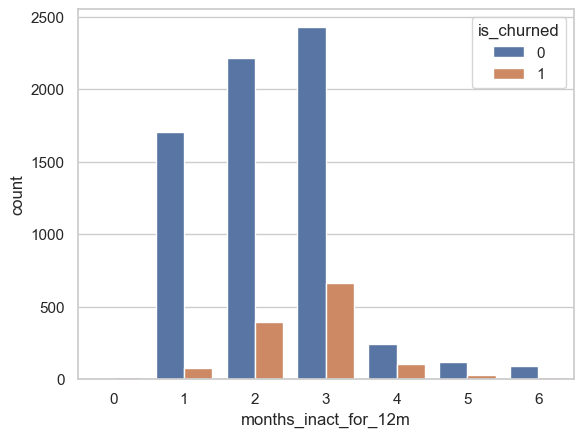

In [ ]:
sns.countplot(x='months_inact_for_12m', data=bank_churner_df, hue='is_churned')

# 세부 분석 할 필요가 있음

### contact_cnt_for_12m : 최근 12개월 동안 연락 횟수

In [ ]:
bank_churner_df['contact_cnt_for_12m'].value_counts()

3    2716
2    2596
1    1207
4    1092
0     312
5     133
6      45
Name: contact_cnt_for_12m, dtype: int64

<Axes: xlabel='contact_cnt_for_12m', ylabel='count'>

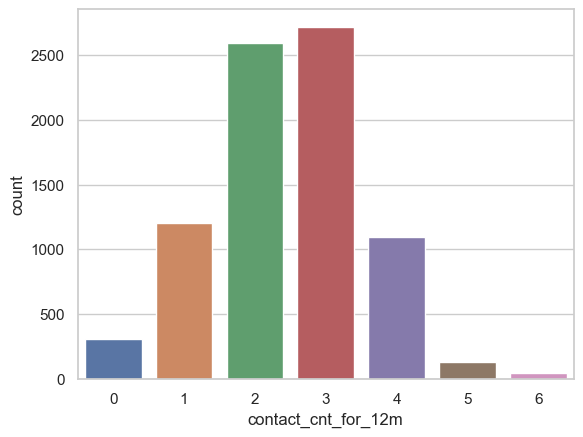

In [ ]:
sns.countplot(x='contact_cnt_for_12m', data=bank_churner_df)

<Axes: xlabel='contact_cnt_for_12m', ylabel='count'>

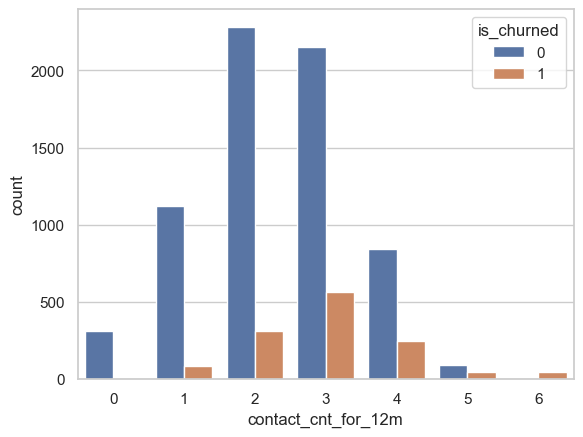

In [ ]:
sns.countplot(x='contact_cnt_for_12m', data=bank_churner_df, hue='is_churned')

# 세부적으로 이탈율 분석 필요해 보임

### credit_line : 카드 한도

In [ ]:
bank_churner_df['credit_line'].value_counts()

1438.3     413
34516.0    399
9959.0      15
15987.0     14
23981.0      9
          ... 
18177.0      1
32024.0      1
6551.0       1
11077.0      1
2951.0       1
Name: credit_line, Length: 5325, dtype: int64

In [ ]:
bank_churner_df['credit_line'].describe()

count     8101.000000
mean      8636.548068
std       9086.419557
min       1438.300000
25%       2555.000000
50%       4549.000000
75%      11128.000000
max      34516.000000
Name: credit_line, dtype: float64

<Axes: title={'center': '카드 이탈 여부별 한도별 분포'}, xlabel='credit_line', ylabel='Count'>

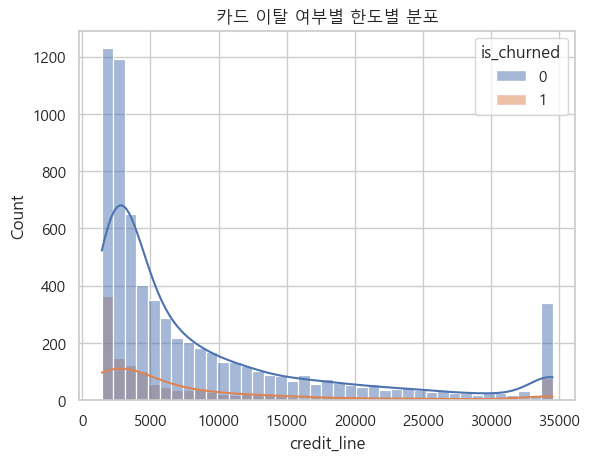

In [ ]:
plt.title('카드 이탈 여부별 한도별 분포')
sns.histplot(x='credit_line', data=bank_churner_df, kde=True, hue='is_churned')

In [ ]:
def calcCreditLine(credit_line):
    credit_line = (credit_line // 1000) * 1000
    return credit_line

bank_churner_df['credit_line_category'] = bank_churner_df.credit_line.apply(calcCreditLine)
bank_churner_df

<Axes: title={'center': '카드 한도별 분포 및 이탈 현황'}, xlabel='credit_line_category', ylabel='Count'>

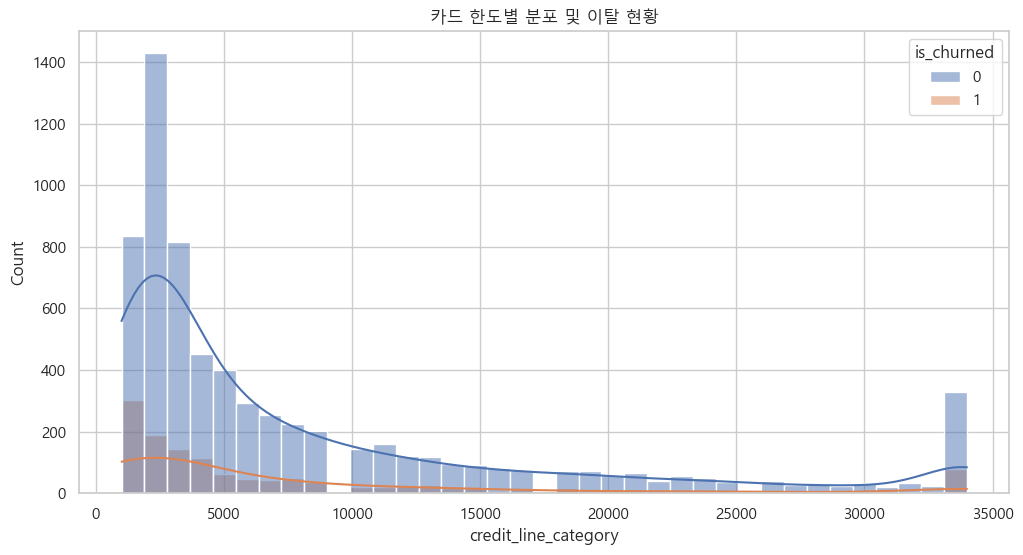

In [229]:
plt.figure(figsize=(12, 6))
plt.title('카드 한도별 분포 및 이탈 현황')
# sns.countplot(x='credit_line_category', data=bank_churner_df, hue='is_churned')
sns.histplot(x='credit_line_category', data=bank_churner_df, kde=True, hue='is_churned')

### tot_revol_balance : 리볼빙 잔액

In [212]:
bank_churner_df['tot_revol_balance'].value_counts()

0.0       1610
2517.0     341
1965.0       9
1300.0       9
1434.0       9
          ... 
2188.0       1
1161.0       1
2490.0       1
1441.0       1
1317.0       1
Name: tot_revol_balance, Length: 1785, dtype: int64

In [213]:
bank_churner_df['tot_revol_balance'].describe()

count    6580.000000
mean     1158.693313
std       814.653118
min         0.000000
25%       324.750000
50%      1272.000000
75%      1777.250000
max      2517.000000
Name: tot_revol_balance, dtype: float64

<Axes: title={'center': '리볼빙 잔액 분포 및 이탈여부 현황'}, xlabel='tot_revol_balance', ylabel='Count'>

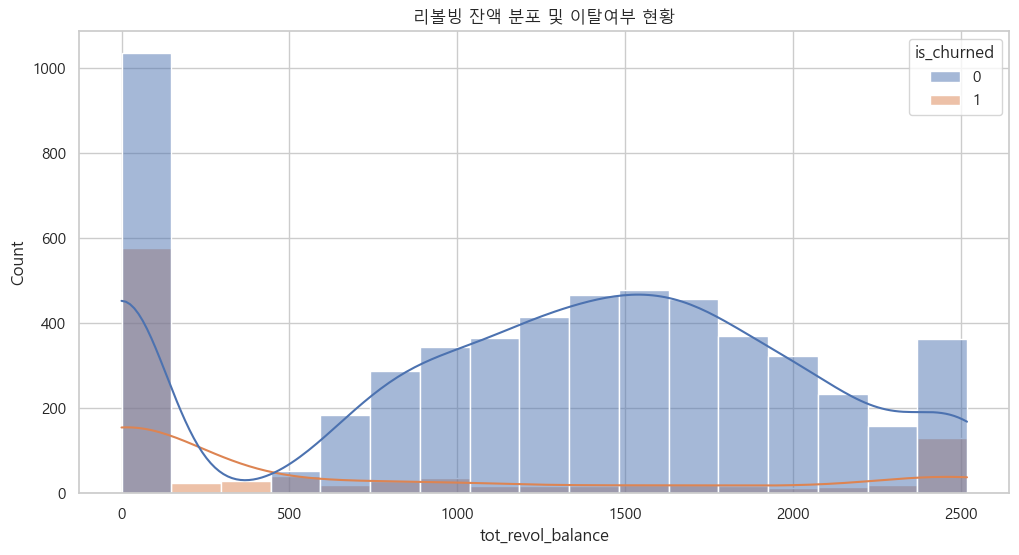

In [227]:
plt.figure(figsize=(12, 6))
plt.title('리볼빙 잔액 분포 및 이탈여부 현황')
sns.histplot(x='tot_revol_balance', data=bank_churner_df, kde=True, hue='is_churned')

In [217]:
def calcRevolBal(tot_revol_balance):
    tot_revol_balance = (tot_revol_balance // 1000) * 1000
    return tot_revol_balance

bank_churner_df['tot_revol_balance_category'] = bank_churner_df.tot_revol_balance.apply(calcRevolBal)

<Axes: title={'center': '리볼빙 잔액 분포 및 이탈여부 현황'}, xlabel='tot_revol_balance_category', ylabel='Count'>

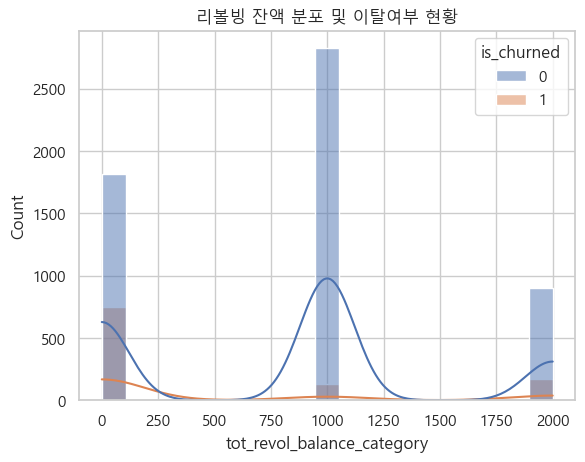

In [218]:
plt.title('리볼빙 잔액 분포 및 이탈여부 현황')
sns.histplot(x='tot_revol_balance_category', data=bank_churner_df, kde=True, hue='is_churned')

<Axes: title={'center': '리볼빙 잔액 분포 및 이탈여부 현황'}, xlabel='tot_revol_balance_category', ylabel='count'>

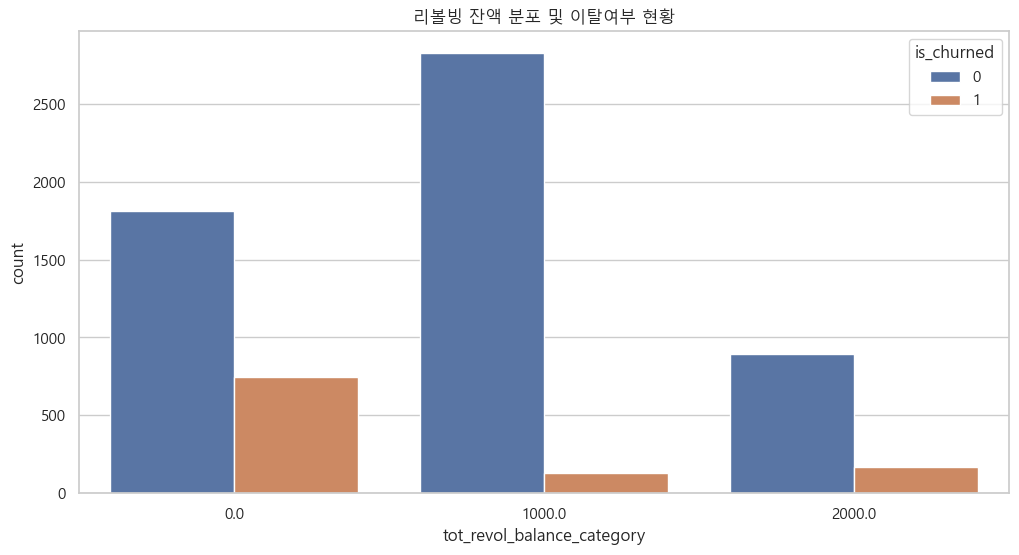

In [226]:
plt.figure(figsize=(12, 6))
plt.title('리볼빙 잔액 분포 및 이탈여부 현황')
sns.countplot(x='tot_revol_balance_category', data=bank_churner_df, hue='is_churned')

In [222]:
bank_churner_df.groupby(['tot_revol_balance_category','is_churned'], as_index=False)['cstno'].count()

,tot_revol_balance_category,is_churned,cstno
0,0.0,0,1813
1,0.0,1,749
2,1000.0,0,2825
3,1000.0,1,128
4,2000.0,0,897
5,2000.0,1,168


### mean_open_to_buy : 평균 사용가능 신용한도

In [231]:
bank_churner_df['mean_open_to_buy'].value_counts()

1438.3     261
34516.0     81
31999.0     21
933.0        6
1129.0       6
          ... 
4473.0       1
3853.0       1
3616.0       1
32224.0      1
993.0        1
Name: mean_open_to_buy, Length: 5757, dtype: int64

In [232]:
bank_churner_df['mean_open_to_buy'].describe()


count     8101.000000
mean      7476.165276
std       9080.279910
min          3.000000
25%       1341.000000
50%       3495.000000
75%       9942.000000
max      34516.000000
Name: mean_open_to_buy, dtype: float64

<Axes: title={'center': '편균 사용가능 신용한도 분포 및 이탈 현황'}, xlabel='mean_open_to_buy', ylabel='Count'>

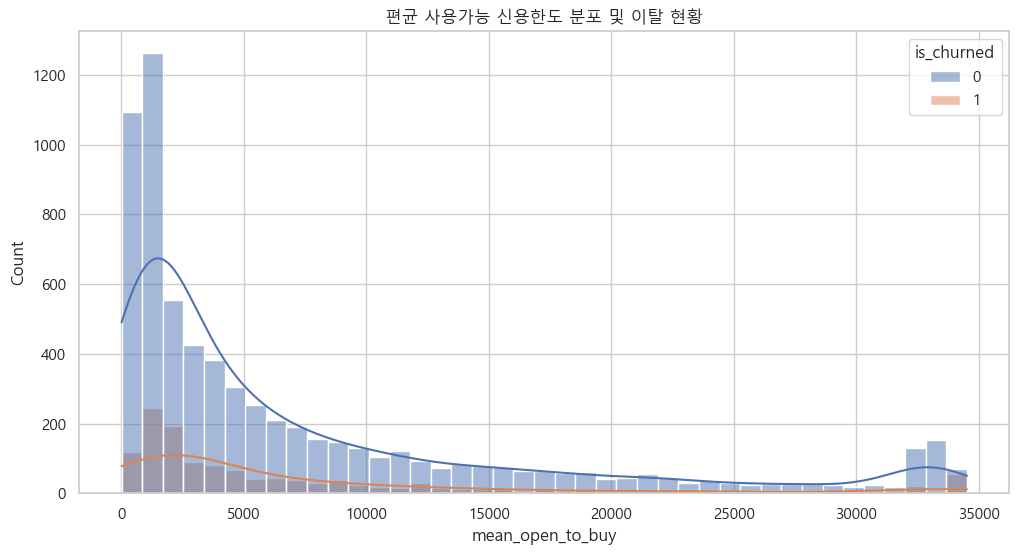

In [233]:
plt.figure(figsize=(12, 6))
plt.title('평균 사용가능 신용한도 분포 및 이탈 현황')
sns.histplot(x='mean_open_to_buy', data=bank_churner_df, kde=True, hue='is_churned')

In [234]:
def calcMeanOpenBuy(mean_open_to_buy):
    mean_open_to_buy = (mean_open_to_buy // 1000) * 1000
    return mean_open_to_buy

bank_churner_df['mean_open_to_buy_category'] = bank_churner_df.mean_open_to_buy.apply(calcMeanOpenBuy)

<Axes: title={'center': '평균 사용가능 신용한도 분포 및 이탈 현황'}, xlabel='mean_open_to_buy_category', ylabel='Count'>

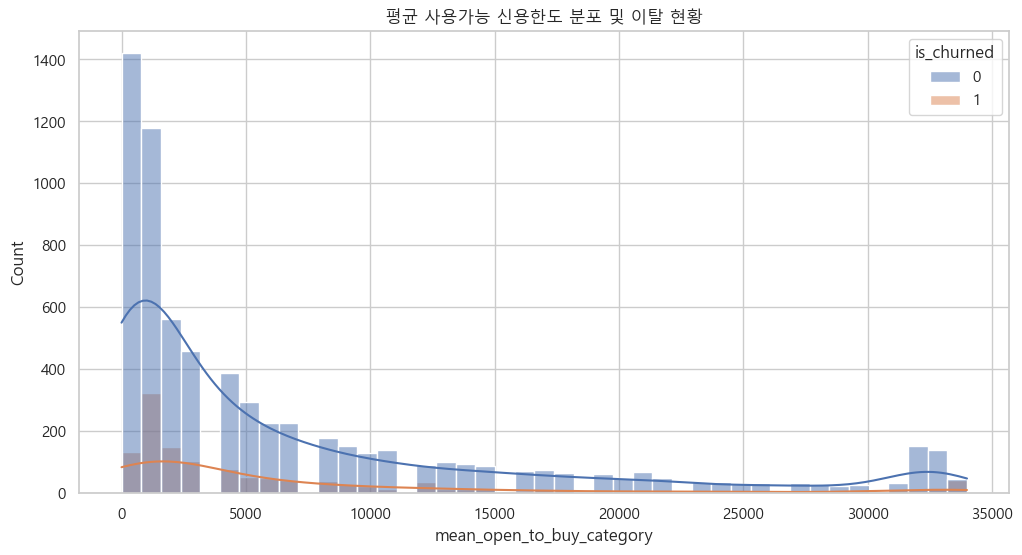

In [237]:
plt.figure(figsize=(12, 6))
plt.title('평균 사용가능 신용한도 분포 및 이탈 현황')
sns.histplot(x='mean_open_to_buy_category', data=bank_churner_df, kde=True, hue='is_churned')

<Axes: title={'center': '평균 사용가능 신용한도 분포 및 이탈 현황'}, xlabel='count', ylabel='mean_open_to_buy_category'>

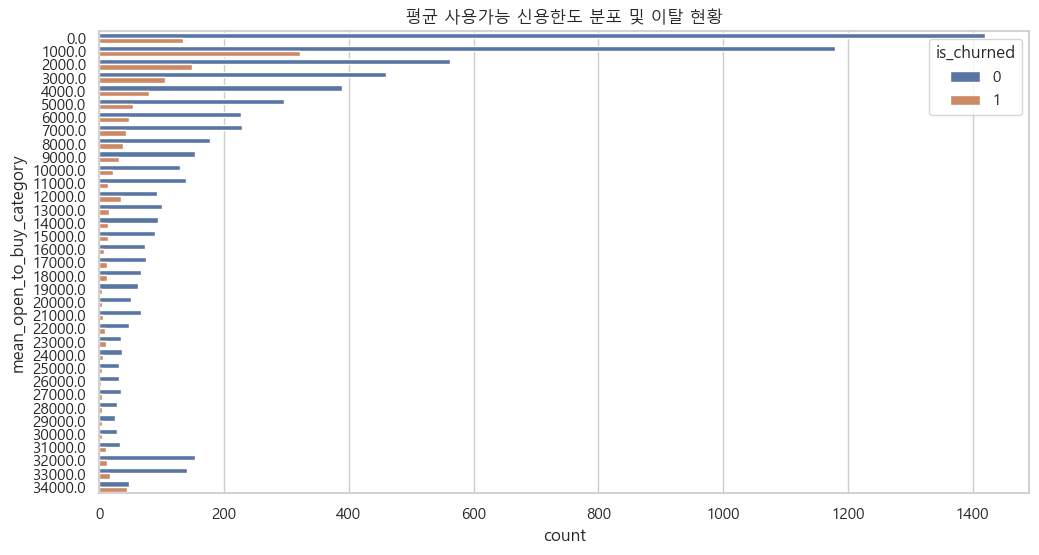

In [239]:
plt.figure(figsize=(12, 6))
plt.title('평균 사용가능 신용한도 분포 및 이탈 현황')
sns.countplot(y='mean_open_to_buy_category', data=bank_churner_df, hue='is_churned')

## category를 5000단위로 구분 해 볼까??

### tot_amt_ratio_q4_q1 : 1분기 대비 4분기의 거래 금액 비율

In [241]:
bank_churner_df['tot_amt_ratio_q4_q1'].describe()

count    5666.000000
mean        0.761457
std         0.217645
min         0.000000
25%         0.631000
50%         0.739000
75%         0.862000
max         2.594000
Name: tot_amt_ratio_q4_q1, dtype: float64

In [321]:
tot_cnt = bank_churner_df['tot_amt_ratio_q4_q1'].count().sum()
tot_null_cnt = bank_churner_df['tot_amt_ratio_q4_q1'].isnull().sum()
print(f'전체 데이터 건수 = {tot_cnt:,} Null 건수 = {tot_null_cnt:,} 전체 데이터 중 널 비율 =  {round(tot_null_cnt / tot_cnt,2)}') 

전체 데이터 건수 = 5,666 Null 건수 = 2,435 전체 데이터 중 널 비율 =  0.43


<Axes: title={'center': '1분기 대비 4분기의 거래 금액 분포 및 이탈 현황'}, xlabel='tot_amt_ratio_q4_q1', ylabel='Count'>

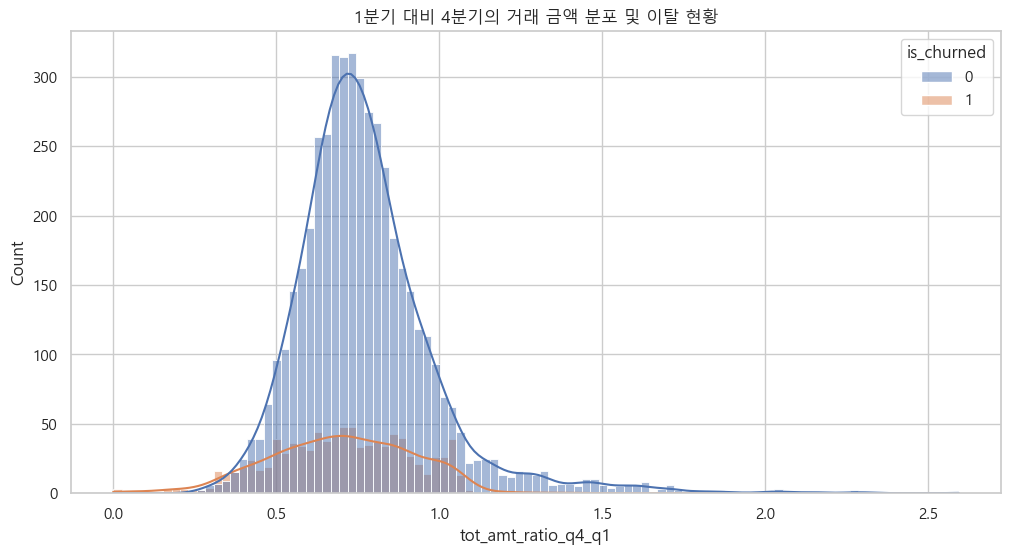

In [243]:
plt.figure(figsize=(12, 6))
plt.title('1분기 대비 4분기의 거래 금액 분포 및 이탈 현황')
sns.histplot(x='tot_amt_ratio_q4_q1', data=bank_churner_df, kde=True, hue='is_churned')

In [322]:
np.ceil(bank_churner_df.tot_amt_ratio_q4_q1 * 10) / 10


0       0.9
1       1.0
2       NaN
3       0.9
4       0.6
       ... 
8096    NaN
8097    NaN
8098    NaN
8099    0.7
8100    0.9
Name: tot_amt_ratio_q4_q1, Length: 8101, dtype: float64

In [360]:
# 범주화

bank_churner_df['tot_amt_ratio_q4_q1_category'] = np.floor(bank_churner_df[bank_churner_df['tot_amt_ratio_q4_q1'].notnull()]['tot_amt_ratio_q4_q1'] * 10)/10

In [357]:
bank_churner_df[['tot_amt_ratio_q4_q1', 'tot_amt_ratio_q4_q1_category']]

,tot_amt_ratio_q4_q1,tot_amt_ratio_q4_q1_category
0,0.831,0.8
1,0.992,0.9
2,NaN,NaN
3,0.827,0.8
4,0.598,0.5
...,...,...
8096,NaN,NaN
8097,NaN,NaN
8098,NaN,NaN
8099,0.613,0.6


<Axes: title={'center': '1분기 대비 4분기의 거래 금액 분포 및 이탈 현황'}, xlabel='tot_amt_ratio_q4_q1_category', ylabel='Count'>

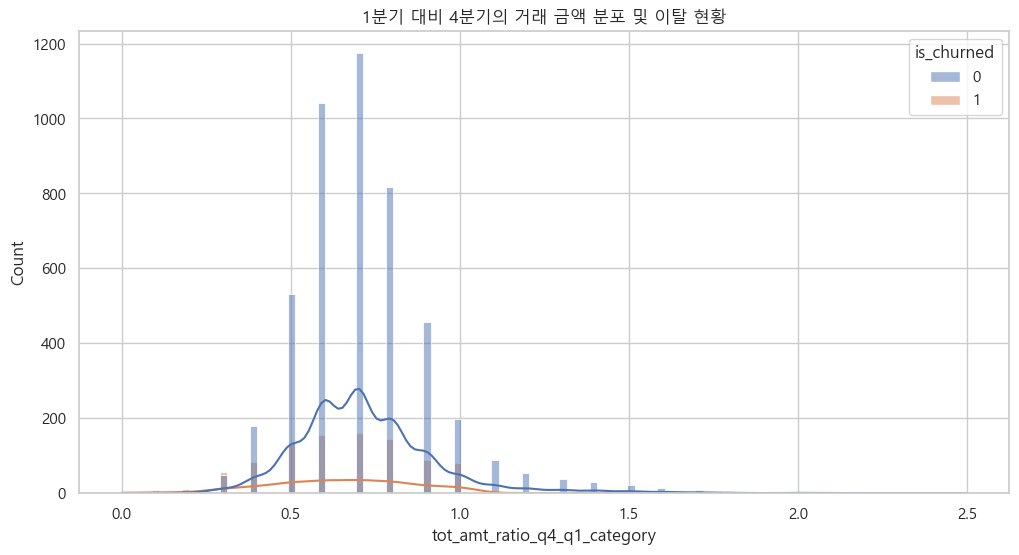

In [358]:
plt.figure(figsize=(12, 6))
plt.title('1분기 대비 4분기의 거래 금액 분포 및 이탈 현황')
sns.histplot(x='tot_amt_ratio_q4_q1_category', data=bank_churner_df, kde=True, hue='is_churned')

<Axes: title={'center': '1분기 대비 4분기의 거래 금액 분포 및 이탈 현황'}, xlabel='tot_amt_ratio_q4_q1_category', ylabel='count'>

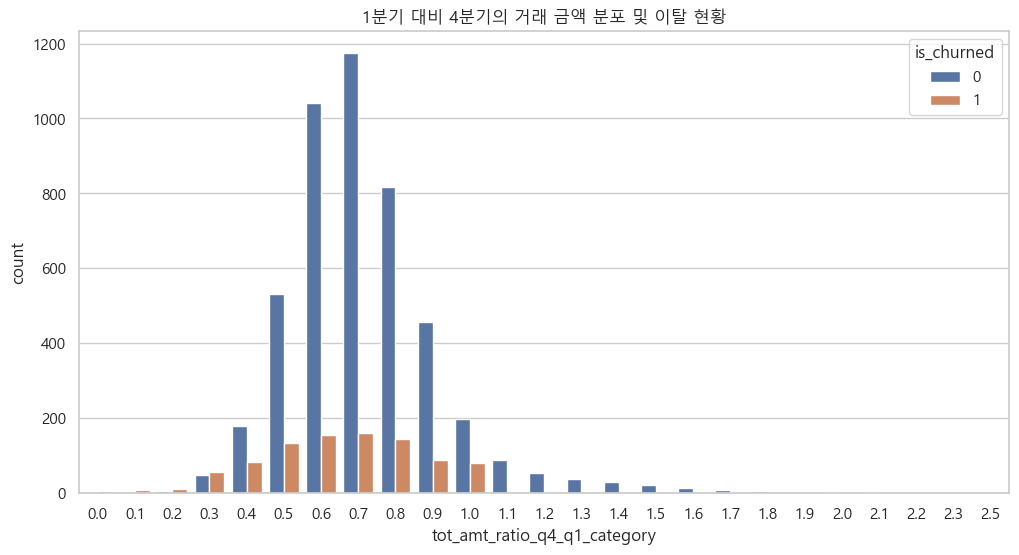

In [359]:
plt.figure(figsize=(12, 6))
plt.title('1분기 대비 4분기의 거래 금액 분포 및 이탈 현황')
sns.countplot(x='tot_amt_ratio_q4_q1_category', data=bank_churner_df, hue='is_churned')

# 범주를 재설정하여 그래프 그릴 필요 있음??

### tot_trans_amt_for_12m : 최근 12개월 동안의 거래 금액

In [335]:
tot_cnt = bank_churner_df['tot_trans_amt_for_12m'].count().sum()
tot_null_cnt = bank_churner_df['tot_trans_amt_for_12m'].isnull().sum()
print(f'전체 데이터 건수 = {tot_cnt:,} Null 건수 = {tot_null_cnt:,} 전체 데이터 중 널 비율 =  {round(tot_null_cnt / tot_cnt,2)}') 

전체 데이터 건수 = 6,432 Null 건수 = 1,669 전체 데이터 중 널 비율 =  0.26


<Axes: title={'center': '최근 12개월 동안의 거래 금액 분포 및 이탈 현황'}, xlabel='tot_trans_amt_for_12m', ylabel='Count'>

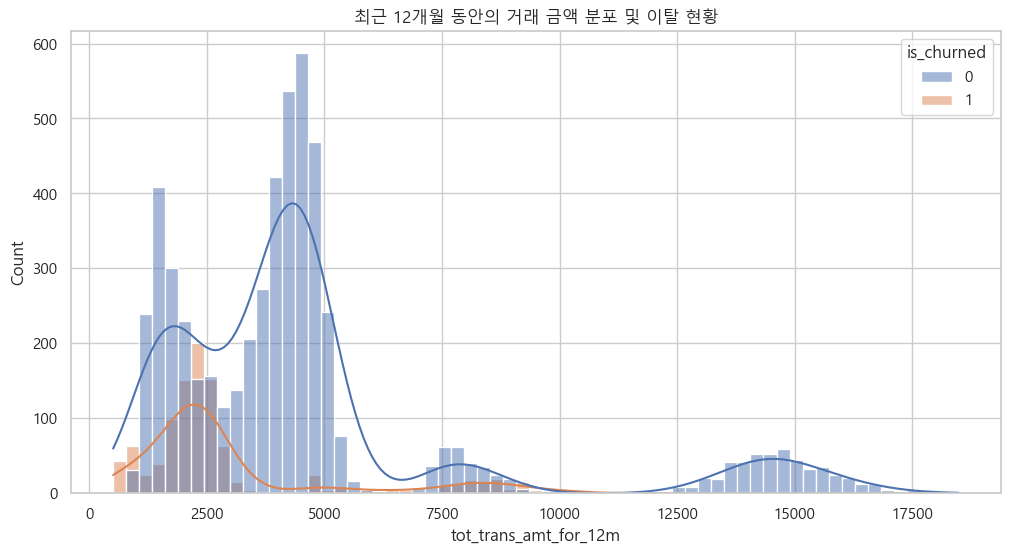

In [336]:
plt.figure(figsize=(12, 6))
plt.title('최근 12개월 동안의 거래 금액 분포 및 이탈 현황')
sns.histplot(x='tot_trans_amt_for_12m', data=bank_churner_df, kde=True, hue='is_churned')

In [344]:
# 금액 범주화 : $1000 단위
bank_churner_df['tot_trans_amt_for_12m_category'] = bank_churner_df.tot_trans_amt_for_12m.apply(calcMeanOpenBuy)

<Axes: title={'center': '최근 12개월 동안의 거래 금액 분포 및 이탈 현황'}, xlabel='tot_trans_amt_for_12m_category', ylabel='count'>

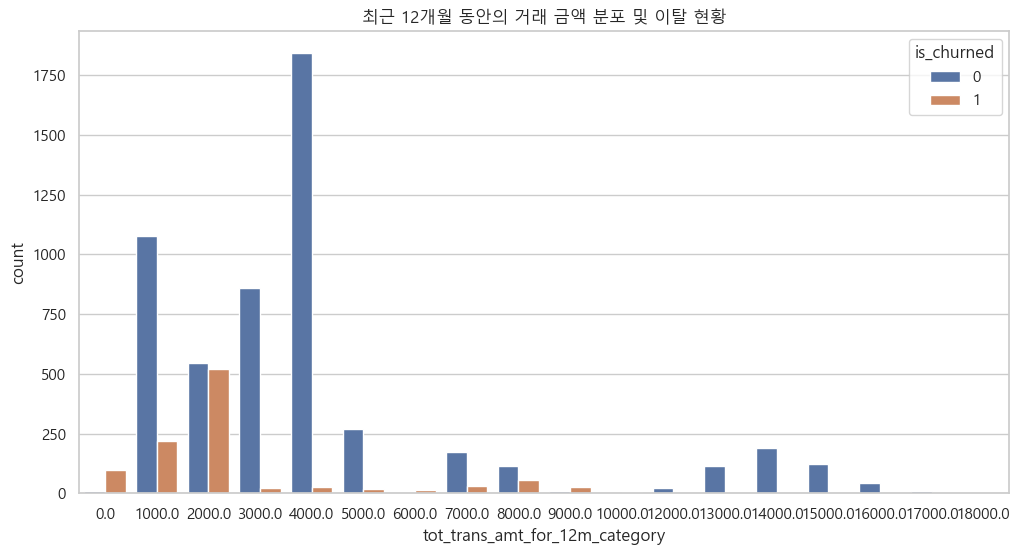

In [346]:
plt.figure(figsize=(12, 6))
plt.title('최근 12개월 동안의 거래 금액 분포 및 이탈 현황')
sns.countplot(x='tot_trans_amt_for_12m_category', data=bank_churner_df, hue='is_churned')

# 범주화할 필요가 있음???

0.0        1554
1000.0     1502
2000.0      710
3000.0      564
4000.0      468
5000.0      350
6000.0      275
7000.0      271
8000.0      216
9000.0      184
32000.0     165
33000.0     158
11000.0     153
10000.0     151
12000.0     127
13000.0     115
14000.0     108
15000.0     103
34000.0      91
17000.0      88
16000.0      81
18000.0      78
21000.0      73
19000.0      67
22000.0      57
20000.0      54
23000.0      46
31000.0      44
24000.0      43
27000.0      38
25000.0      36
26000.0      34
28000.0      34
30000.0      33
29000.0      30
Name: tot_trans_amt_for_12m_category, dtype: int64

### tot_trans_cnt_for_12m : 최근 12개월 동안의 거래 횟수

In [342]:
tot_cnt = bank_churner_df['tot_trans_cnt_for_12m'].count().sum()
tot_null_cnt = bank_churner_df['tot_trans_cnt_for_12m'].isnull().sum()
print(f'전체 데이터 건수 = {tot_cnt:,} Null 건수 = {tot_null_cnt:,} 전체 데이터 중 널 비율 =  {round(tot_null_cnt / tot_cnt,2)}') 

전체 데이터 건수 = 4,851 Null 건수 = 3,250 전체 데이터 중 널 비율 =  0.67


<Axes: title={'center': '최근 12개월 동안의 거래 횟수 분포 및 이탈 현황'}, xlabel='tot_trans_cnt_for_12m', ylabel='Count'>

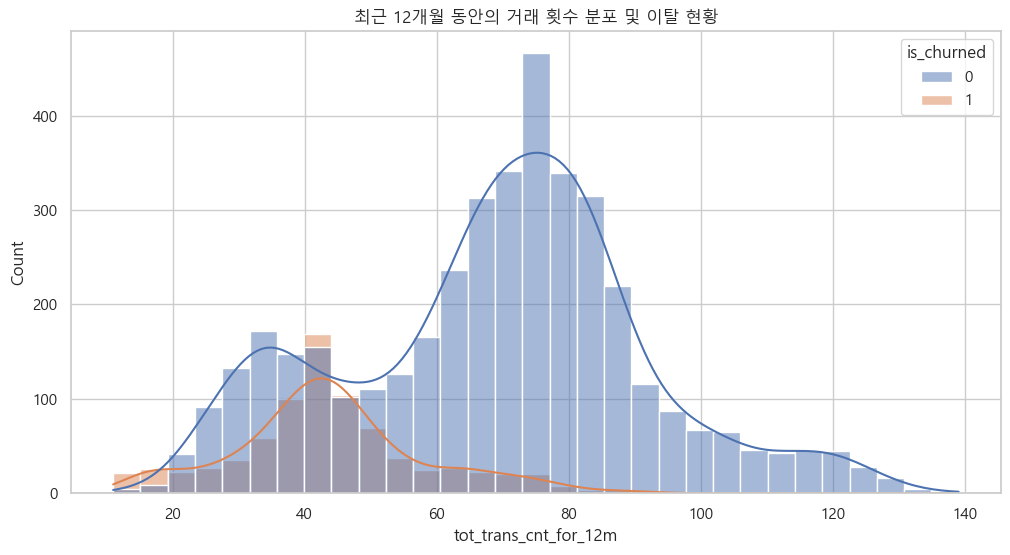

In [343]:
plt.figure(figsize=(12, 6))
plt.title('최근 12개월 동안의 거래 횟수 분포 및 이탈 현황')
sns.histplot(x='tot_trans_cnt_for_12m', data=bank_churner_df, kde=True, hue='is_churned')

In [347]:
# 거래 횟수 범주화 : 10 단위
bank_churner_df['tot_trans_cnt_for_12m_category'] = bank_churner_df['tot_trans_cnt_for_12m'] // 10 * 10

<Axes: title={'center': '최근 12개월 동안의 거래 금액 분포 및 이탈 현황'}, xlabel='tot_trans_cnt_for_12m_category', ylabel='count'>

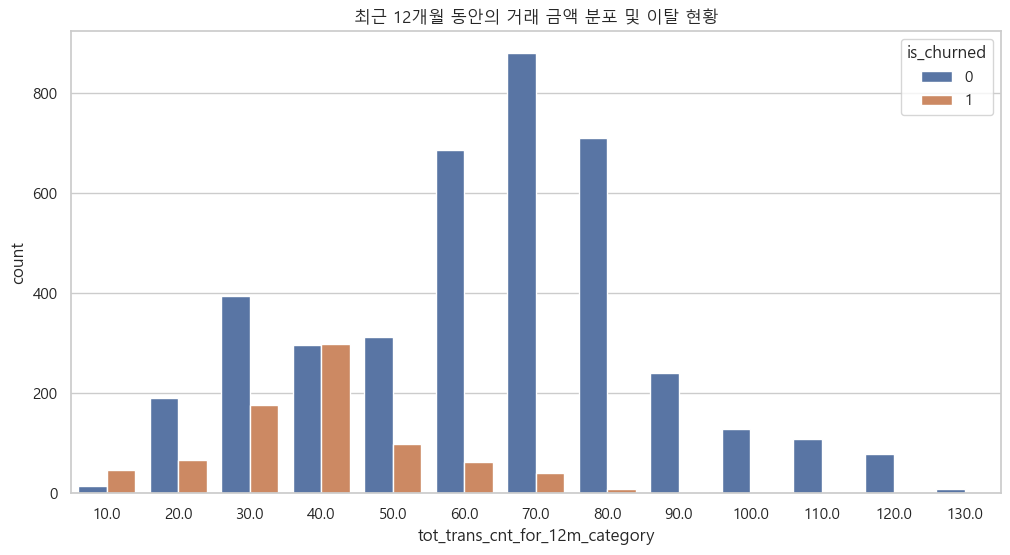

In [349]:
plt.figure(figsize=(12, 6))
plt.title('최근 12개월 동안의 거래 금액 분포 및 이탈 현황')
sns.countplot(x='tot_trans_cnt_for_12m_category', data=bank_churner_df, hue='is_churned')

In [348]:
bank_churner_df[['tot_trans_cnt_for_12m','tot_trans_cnt_for_12m_category']]

,tot_trans_cnt_for_12m,tot_trans_cnt_for_12m_category
0,111.0,110.0
1,21.0,20.0
2,23.0,20.0
3,82.0,80.0
4,NaN,NaN
...,...,...
8096,NaN,NaN
8097,NaN,NaN
8098,NaN,NaN
8099,NaN,NaN


In [350]:
bank_churner_df['tot_trans_cnt_for_12m_category'].value_counts()

70.0     920
60.0     749
80.0     719
40.0     596
30.0     571
50.0     411
20.0     257
90.0     242
100.0    128
110.0    109
120.0     79
10.0      61
130.0      9
Name: tot_trans_cnt_for_12m_category, dtype: int64

### tot_cnt_ratio_q4_q1 : 1분기 대비 4분기의 거래 횟수 비율

In [351]:
bank_churner_df['tot_cnt_ratio_q4_q1'].describe()

count    6472.000000
mean        0.709951
std         0.234484
min         0.000000
25%         0.581000
50%         0.700000
75%         0.818000
max         3.571000
Name: tot_cnt_ratio_q4_q1, dtype: float64

In [352]:
tot_cnt = bank_churner_df['tot_cnt_ratio_q4_q1'].count().sum()
tot_null_cnt = bank_churner_df['tot_cnt_ratio_q4_q1'].isnull().sum()
print(f'전체 데이터 건수 = {tot_cnt:,} Null 건수 = {tot_null_cnt:,} 전체 데이터 중 널 비율 =  {round(tot_null_cnt / tot_cnt,2)}') 

전체 데이터 건수 = 6,472 Null 건수 = 1,629 전체 데이터 중 널 비율 =  0.25


<Axes: title={'center': '1분기 대비 4분기의 거래 횟수 분포 및 이탈 현황'}, xlabel='tot_cnt_ratio_q4_q1', ylabel='Count'>

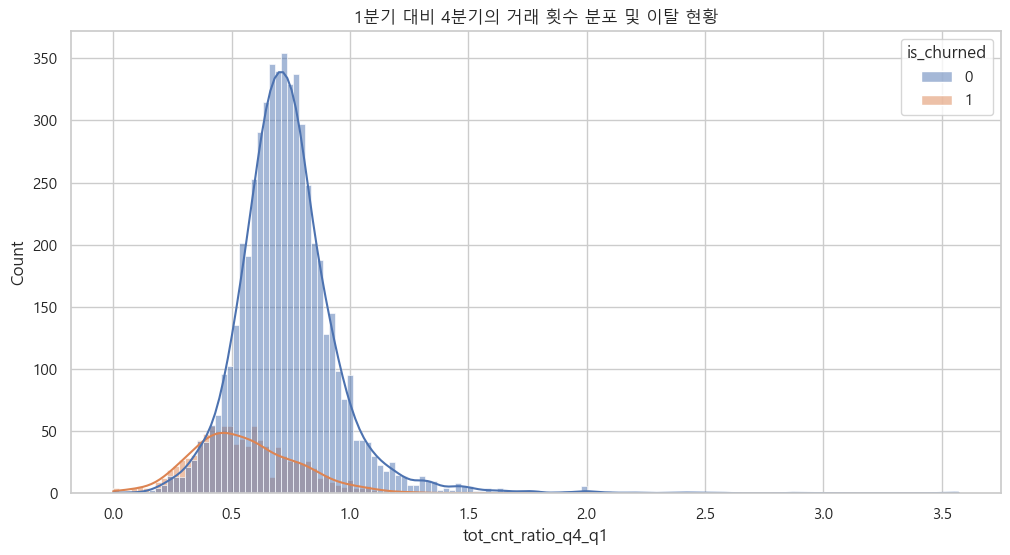

In [363]:
plt.figure(figsize=(12, 6))
plt.title('1분기 대비 4분기의 거래 횟수 분포 및 이탈 현황')
sns.histplot(x='tot_cnt_ratio_q4_q1', data=bank_churner_df, kde=True, hue='is_churned')

In [361]:
# 범주화

bank_churner_df['tot_cnt_ratio_q4_q1_category'] = np.floor(bank_churner_df[bank_churner_df['tot_cnt_ratio_q4_q1'].notnull()]['tot_cnt_ratio_q4_q1'] * 10)/10

In [362]:
bank_churner_df[['tot_cnt_ratio_q4_q1', 'tot_cnt_ratio_q4_q1_category']]

,tot_cnt_ratio_q4_q1,tot_cnt_ratio_q4_q1_category
0,0.734,0.7
1,0.400,0.4
2,0.000,0.0
3,0.952,0.9
4,NaN,NaN
...,...,...
8096,NaN,NaN
8097,0.842,0.8
8098,0.565,0.5
8099,0.741,0.7


<Axes: title={'center': '1분기 대비 4분기의 거래 횟수 분포 및 이탈 현황'}, xlabel='tot_cnt_ratio_q4_q1_category', ylabel='count'>

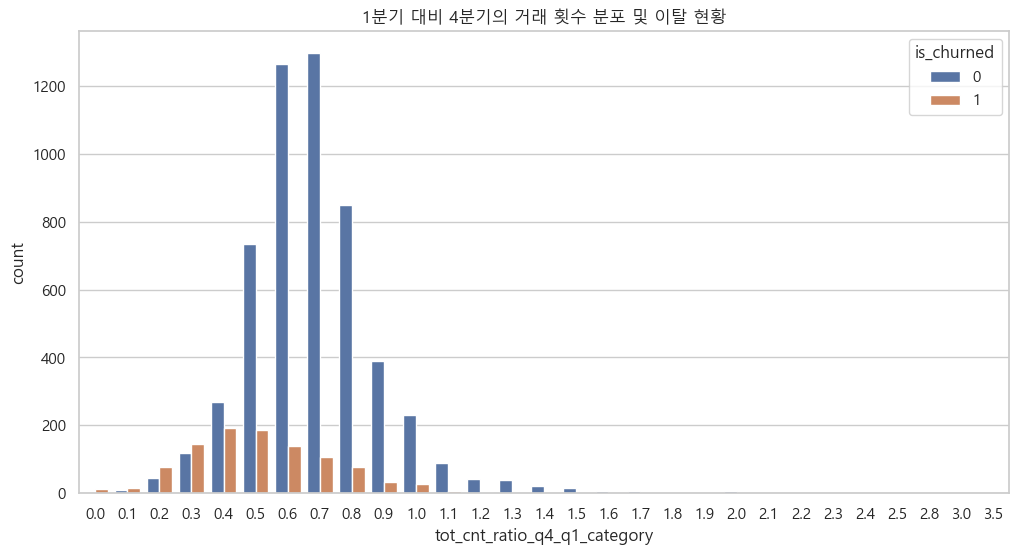

In [366]:
plt.figure(figsize=(12, 6))
plt.title('1분기 대비 4분기의 거래 횟수 분포 및 이탈 현황')
sns.countplot(x='tot_cnt_ratio_q4_q1_category', data=bank_churner_df, hue='is_churned')


In [373]:
bank_churner_df_cnt_ratio_churn = bank_churner_df[bank_churner_df['is_churned'] == 1][['tot_cnt_ratio_q4_q1_category', 'tot_cnt_ratio_q4_q1']]
bank_churner_df_cnt_ratio_churn

,tot_cnt_ratio_q4_q1_category,tot_cnt_ratio_q4_q1
1,0.4,0.400
2,0.0,0.000
10,0.0,0.000
12,0.4,0.417
14,NaN,NaN
...,...,...
8083,1.0,1.077
8088,NaN,NaN
8091,0.3,0.345
8092,NaN,NaN


<Axes: title={'center': '이탈 고객중 1분기 대비 4분기의 거래 횟수 분포'}, xlabel='tot_cnt_ratio_q4_q1', ylabel='Count'>

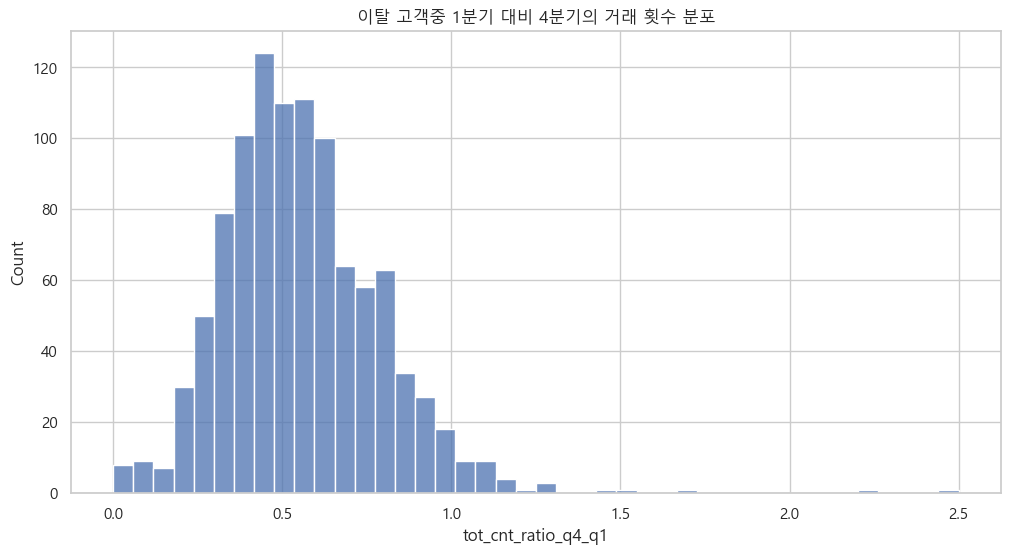

In [375]:
plt.figure(figsize=(12, 6))
plt.title('이탈 고객중 1분기 대비 4분기의 거래 횟수 분포')
sns.histplot(x='tot_cnt_ratio_q4_q1', data=bank_churner_df_cnt_ratio_churn)

<Axes: title={'center': '이탈 고객중 1분기 대비 4분기의 거래 횟수 분포'}, xlabel='tot_cnt_ratio_q4_q1_category', ylabel='count'>

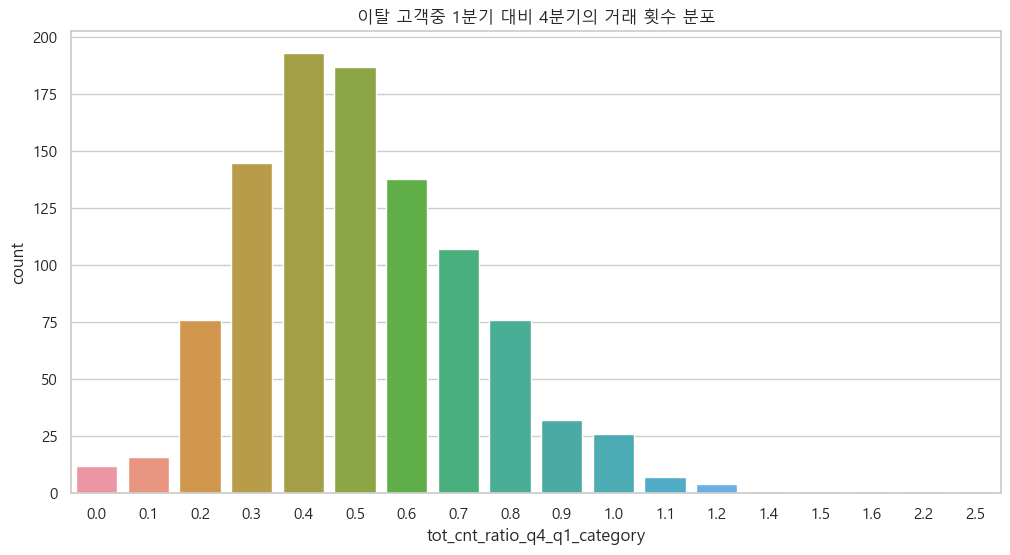

In [372]:
plt.figure(figsize=(12, 6))
plt.title('이탈 고객중 1분기 대비 4분기의 거래 횟수 분포')
sns.countplot(x='tot_cnt_ratio_q4_q1_category', data=bank_churner_df_cnt_ratio_churn)

### mean_util_pct : 평균 한도 소진율

In [376]:
bank_churner_df['mean_util_pct'].describe()

count    5575.000000
mean        0.274055
std         0.275833
min         0.000000
25%         0.023000
50%         0.175000
75%         0.501000
max         0.999000
Name: mean_util_pct, dtype: float64

In [377]:
tot_cnt = bank_churner_df['mean_util_pct'].count().sum()
tot_null_cnt = bank_churner_df['mean_util_pct'].isnull().sum()
print(f'전체 데이터 건수 = {tot_cnt:,} Null 건수 = {tot_null_cnt:,} 전체 데이터 중 널 비율 =  {round(tot_null_cnt / tot_cnt,2)}') 

전체 데이터 건수 = 5,575 Null 건수 = 2,526 전체 데이터 중 널 비율 =  0.45


<Axes: title={'center': '평균 한도 소진율 분포 및 이탈 현황'}, xlabel='mean_util_pct', ylabel='Count'>

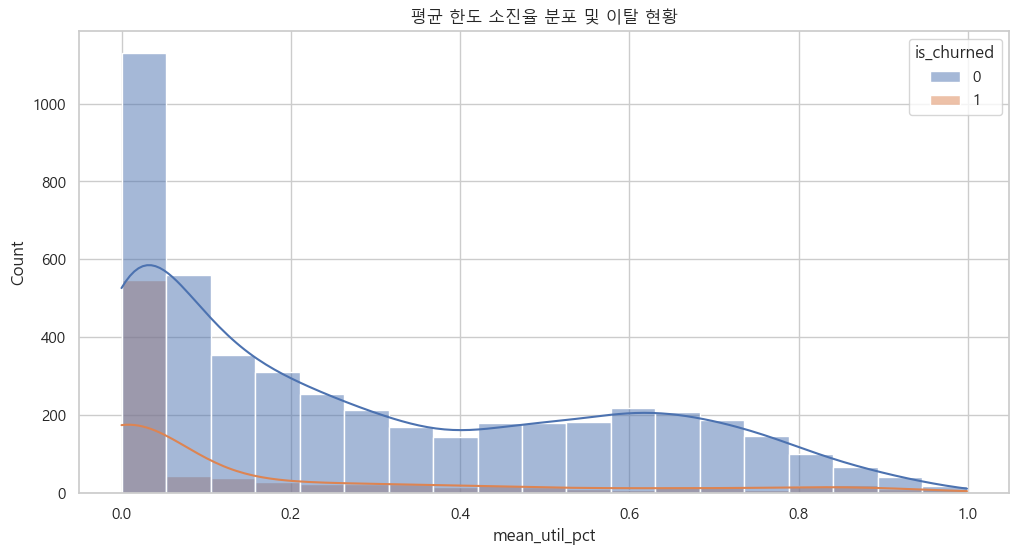

In [378]:
plt.figure(figsize=(12, 6))
plt.title('평균 한도 소진율 분포 및 이탈 현황')
sns.histplot(x='mean_util_pct', data=bank_churner_df, kde=True, hue='is_churned')

In [379]:
# 범주화

bank_churner_df['mean_util_pct_category'] = np.floor(bank_churner_df[bank_churner_df['mean_util_pct'].notnull()]['mean_util_pct'] * 10)/10

<Axes: title={'center': '평균 한도 소진율 분포 및 이탈 현황'}, xlabel='mean_util_pct_category', ylabel='count'>

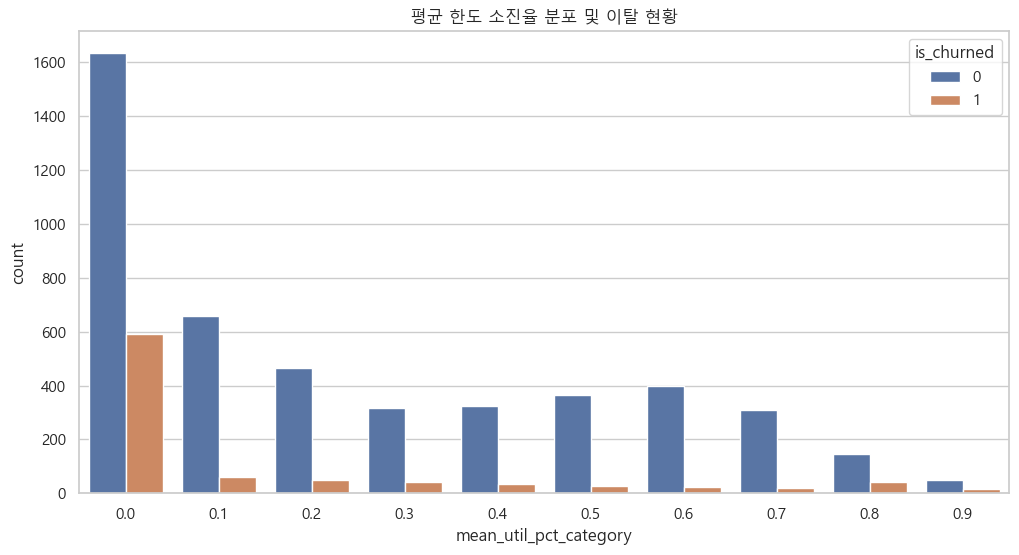

In [380]:
plt.figure(figsize=(12, 6))
plt.title('평균 한도 소진율 분포 및 이탈 현황')
sns.countplot(x='mean_util_pct_category', data=bank_churner_df, hue='is_churned')


In [382]:
bank_churner_df['mean_util_pct_category'].value_counts()

0.0    2224
0.1     722
0.2     515
0.6     424
0.5     392
0.4     359
0.3     356
0.7     331
0.8     185
0.9      67
Name: mean_util_pct_category, dtype: int64

In [383]:
bank_churner_df_mean_util_pct_churn = bank_churner_df[bank_churner_df['is_churned'] == 1][['mean_util_pct_category', 'mean_util_pct']]
bank_churner_df_mean_util_pct_churn

,mean_util_pct_category,mean_util_pct
1,NaN,NaN
2,0.2,0.214
10,0.0,0.000
12,NaN,NaN
14,0.0,0.000
...,...,...
8083,0.0,0.000
8088,0.2,0.263
8091,0.0,0.000
8092,0.0,0.000


<Axes: title={'center': '이탈 고객중 평균 한도 소진율 분포'}, xlabel='mean_util_pct', ylabel='Count'>

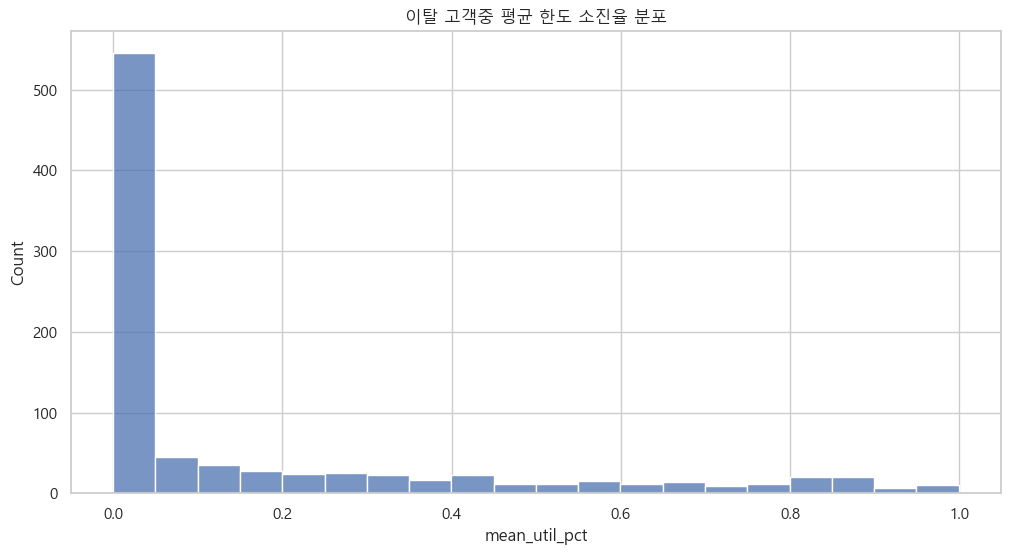

In [384]:
plt.figure(figsize=(12, 6))
plt.title('이탈 고객중 평균 한도 소진율 분포')
sns.histplot(x='mean_util_pct', data=bank_churner_df_mean_util_pct_churn)

<Axes: title={'center': '이탈 고객중 평균 한도 소진율 분포'}, xlabel='mean_util_pct_category', ylabel='count'>

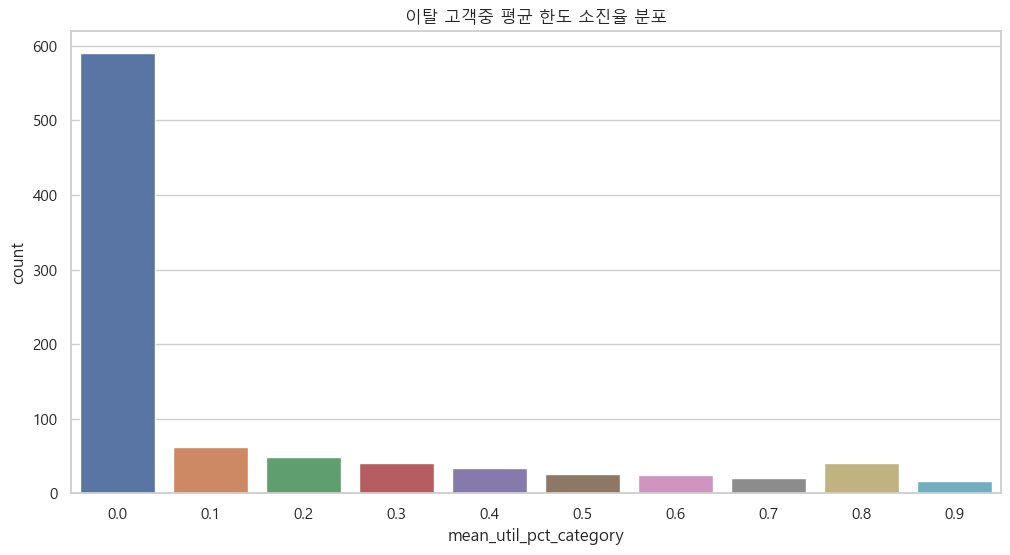

In [385]:
plt.figure(figsize=(12, 6))
plt.title('이탈 고객중 평균 한도 소진율 분포')
sns.countplot(x='mean_util_pct_category', data=bank_churner_df_mean_util_pct_churn)